# **Criação de um Pipeline de Dados para Processamento e Análise de Sellout no Google Cloud Platform**

# **Introdução**
A crescente necessidade de monitoramento eficiente das vendas realizadas por distribuidores exige uma infraestrutura de dados robusta, escalável e automatizada. Para atender a essa demanda, este projeto visa a construção de uma estrutura de Data Lake e Data Warehouse utilizando o Google Cloud Platform (GCP), permitindo a ingestão, processamento e análise dos dados de sellout de forma estruturada e confiável.

Os revendedores realizam o upload de arquivos Excel contendo informações de vendas em um portal web desenvolvido especificamente para essa finalidade. Esses arquivos são processados automaticamente, passando por diversas camadas de tratamento de dados antes de serem armazenados e disponibilizados para análises no BigQuery.

Para garantir a qualidade e integridade dos dados, foram implementadas validações de schema, detecção de erros e logs de inconsistências. Além disso, o projeto conta com particionamento e clusterização no BigQuery, bem como mecanismos de alerta e monitoramento para garantir o funcionamento adequado de toda a pipeline de ingestão.

## **Objetivo**
O objetivo deste projeto é desenvolver uma pipeline automatizada de ingestão e processamento de dados de sellout de distribuidores, garantindo qualidade, escalabilidade e confiabilidade no armazenamento e consumo dos dados.

Com os dados coletados, podemos responder às questões estratégicas e operacionais, como:
1. Qual foi o produto mais vendido em termos de valor?
2. Qual é o total de vendas (Sellout) no período?
3. Qual foi a quantidade total de produtos vendidos?
4. Quais são os top 5 produtos mais vendidos em valor?
5. Qual o desempenho de um produto específico?
6. Quais distribuidores venderam mais?
7. Quanto cada distribuidor vendeu por mês?
8. Qual foi o mês com maior faturamento total?
9. Há uma queda ou aumento nas vendas recentes?

A solução implementada realiza as seguintes funções:
- Coleta dos dados via upload de arquivos CSV/XLSX em um portal web.
- Armazenamento dos dados coletados em um Bucket do Cloud Storage
- Ingestão automática dos dados no BigQuery via Cloud Run.
- Validação de schema e qualidade dos dados, armazenando logs de erros para monitoramento.
- Modelagem dos dados em um formato estruturado (camadas raw e transformada no BigQuery).
- Disponibilização dos dados por meio de um BI para consumo e análise.

Com essa estrutura, o projeto garantirá um fluxo de dados automatizado, escalável e confiável, permitindo análises estratégicas dos dados de sellout dos distribuidores.


## **Introdução ao Google Cloud**

O Google Cloud é a plataforma de computação em nuvem do Google, oferecendo serviços para armazenamento, processamento e análise de dados, hospedagem de aplicativos, inteligência artificial, entre outros. Ele compete com outras plataformas como AWS (Amazon Web Services) e Azure (Microsoft).

Principais serviços do Google Cloud:
- Compute Engine – Máquinas virtuais para rodar aplicações.
- Cloud Storage – Armazenamento de arquivos (como um "Google Drive" para empresas).
- BigQuery – Banco de dados analítico para processar grandes volumes de dados rapidamente.
- Cloud Functions – Executa código em resposta a eventos, como o upload de um arquivo.
- Dataflow – Processamento de dados em tempo real ou em lote.
- Cloud SQL – Bancos de dados gerenciados (MySQL, PostgreSQL, SQL Server).
- Cloud Pub/Sub – Sistema de mensagens para integrar diferentes serviços.
- Cloud Run – Executa aplicativos em containers de forma escalável.
- Cloud Composer – Orquestração de pipelines de dados com Apache Airflow.
- Dataproc – Processamento de Big Data usando Hadoop e Spark.

Neste projeto, estaremos usando Cloud Storage, BigQuery e Cloud Run para montar um Data Lake e um Data Warehouse com os dados de sellout dos distribuidores.

### **Configuração Inicial no Google Cloud**
Para iniciar o projeto, foi necessário criar uma conta no Google Cloud Platform (GCP). O primeiro passo foi acessar o Google Cloud Console e configurar uma conta gratuita. O Google oferece créditos iniciais para novos usuários, permitindo explorar e utilizar diversos serviços da plataforma sem custos imediatos.

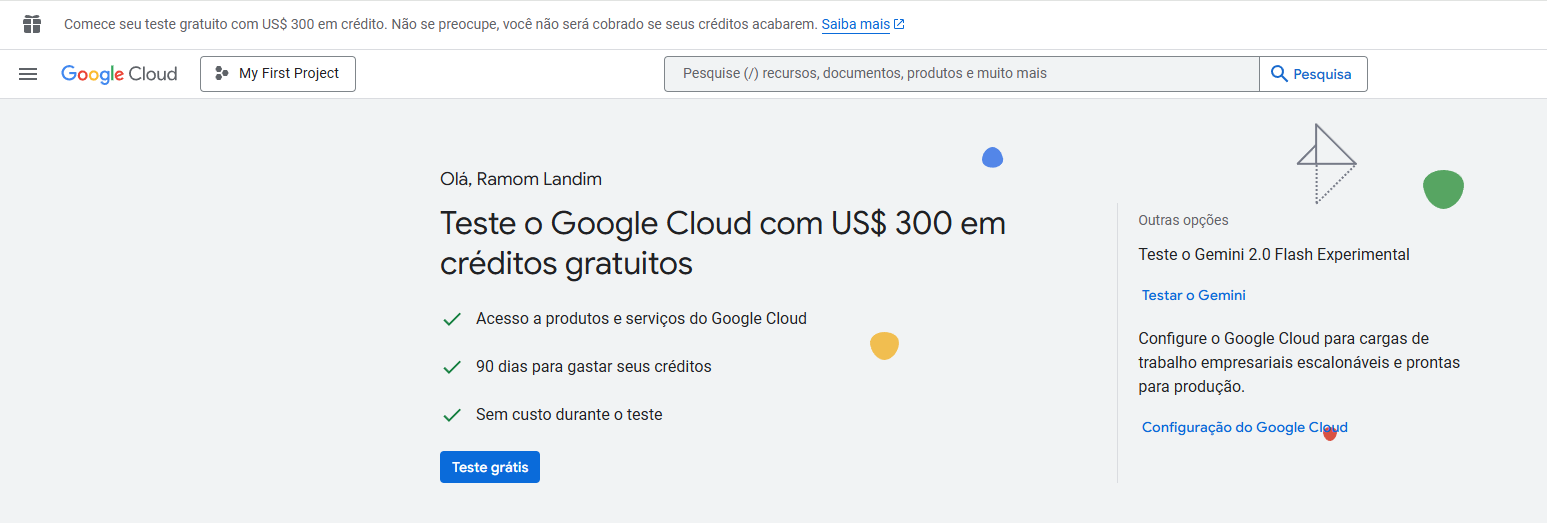

Após a criação da conta, foi necessário:
- Criar um novo projeto no Google Cloud, que servirá como ambiente principal para organizar os recursos.

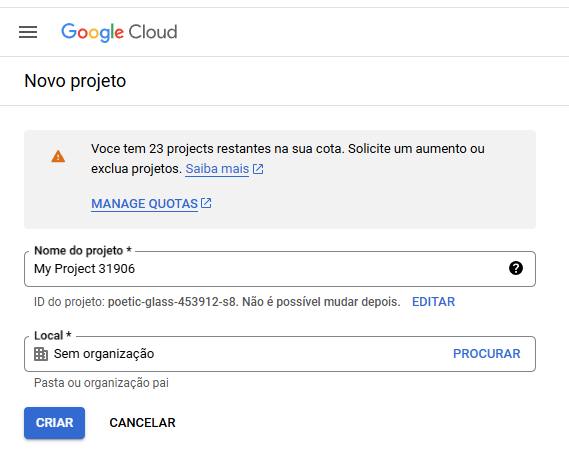


- Habilitar as APIs essenciais, incluindo:

    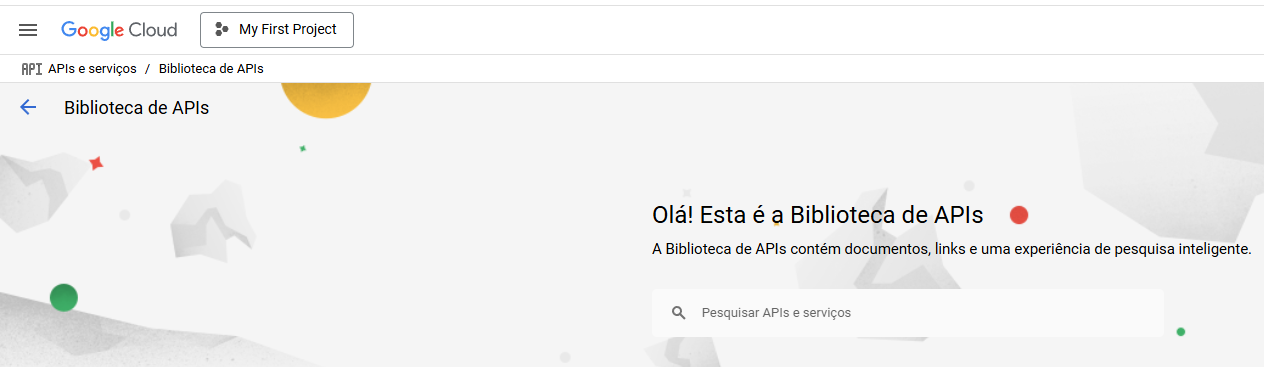
    
    - Cloud Storage API (para armazenar arquivos)
    
    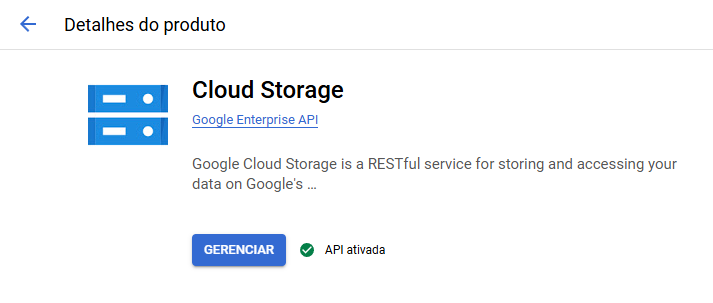

    - BigQuery API (para processamento e análise de dados)
    
    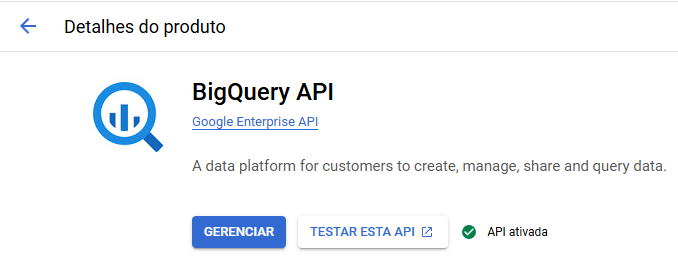

    - Cloud Run API (para execução de aplicações serverless)

    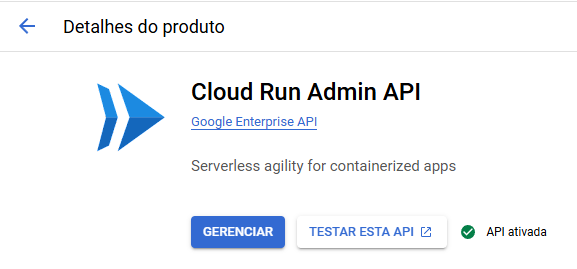

- Configurar permissões de acesso para garantir a comunicação segura entre os serviços dentro do projeto.
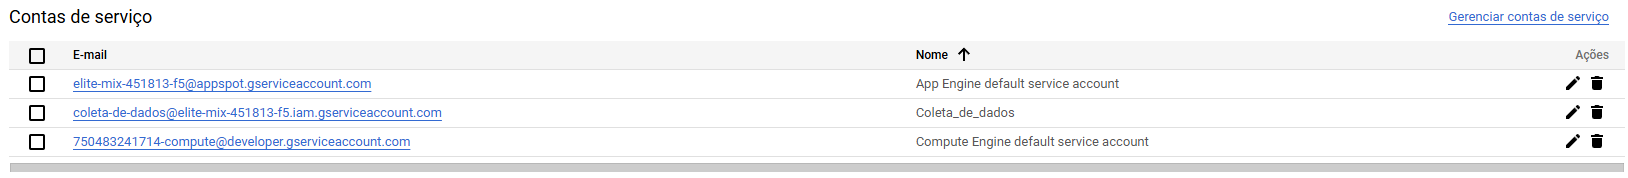


## **Coleta dos dados**

### **Cloud Storage**
Cloud Storage é um serviço de armazenamento de dados em nuvem, que permite guardar arquivos digitais em servidores externos.
 
Como funciona:
 - Os dados são armazenados em servidores mantidos por um provedor de nuvem terceirizado.
 - O provedor gerencia a hospedagem, segurança e manutenção dos dados.
 - O Cloud Storage é escalável, permitindo ajustar o armazenamento conforme a necessidade.

Após a configuração inicial do Google Cloud, daremos início ao projeto com a implementação do Cloud Storage, que inclui a criação do bucket e a organização de suas pastas para o armazenamento adequado dos dados. 

A estrutura proposta será:
- Criação de um bucket, ou seja, um contêiner de armazenamento dentro do Cloud Storage, usado para guardar arquivos (objetos). Ele funciona como uma pasta na nuvem, mas com mais controle sobre permissões, replicação e políticas de retenção.
- Criação de subpastas para controle dos dados.

Para se criar o bucket, basta acessar a Cloud Storage e clicar no botão "Criar Bucket":

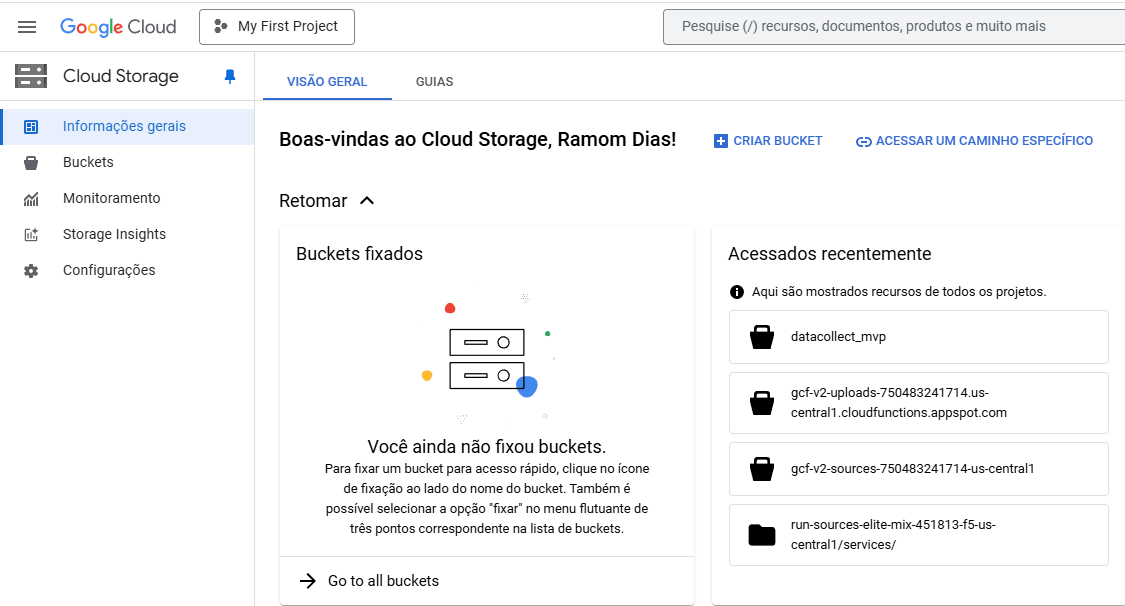

Ao criar um bucket, há diversos campos a serem preenchidos, como:
- Nome do Bucket
- Região que o servidor irá estará localizado
- Classe de armazenamento dos dados
- Controlar o acesso a objetos
- Proteção para os dados do objeto

A imagem a seguir mostra a configuração dos buckets do projeto

- datacollect_mvp: Bucket para armazenamento dos arquivos recebidos do usuário

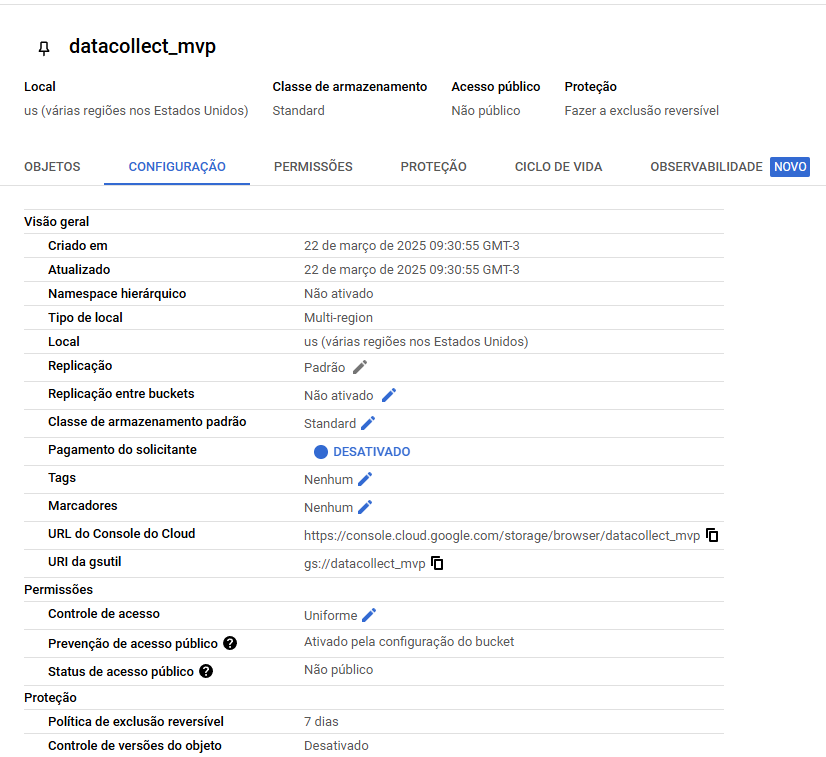

- tabdimensoes: Bucket para armazenamento das tabelas dimensões, no futuro serão extraídas de ferramentas de ERP

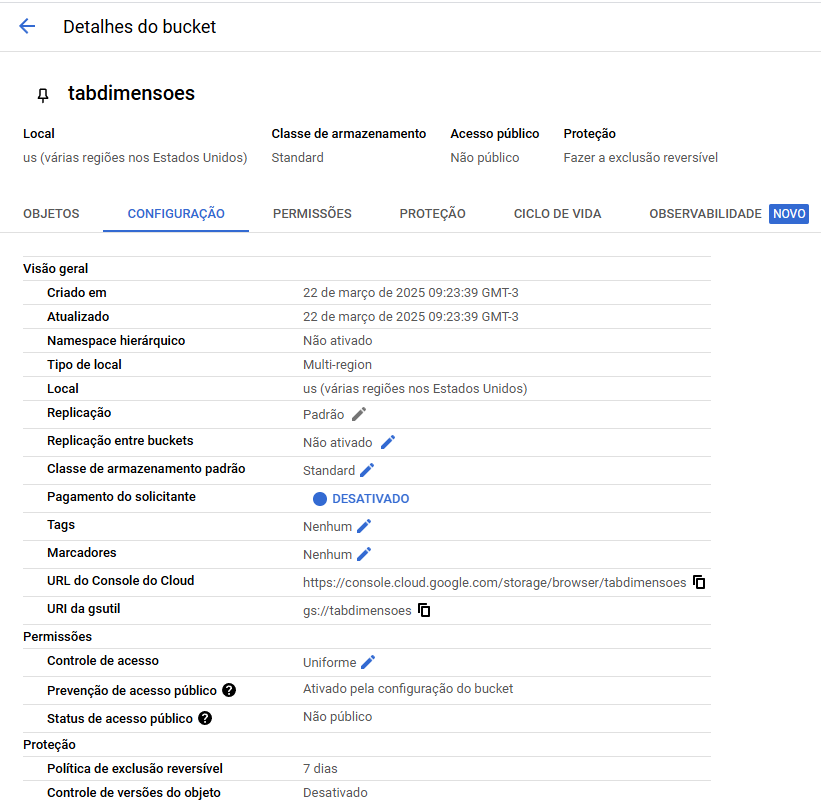



### **Site de coleta de dados**

Com o objetivo de facilitar a interação e o armazenamento dos dados dos revendedores externos, foi desenvolvido um site para que os usuários possam interagir com o Cloud Storage, sem a possibilidade de manipular os dados diretamente. O código foi implementado em Python, utilizando a biblioteca Flask. Embora a criação de usuários seja uma necessidade futura, como se trata de um MVP (Produto Mínimo Viável), o site foi projetado de forma simples, contendo apenas uma tela para o input de dados.

Os dados serão inseridos por meio de um arquivo Excel, que deverá seguir o template mostrado na imagem abaixo e também disponível na pasta Arquivos/arquivo_template.xlsx:
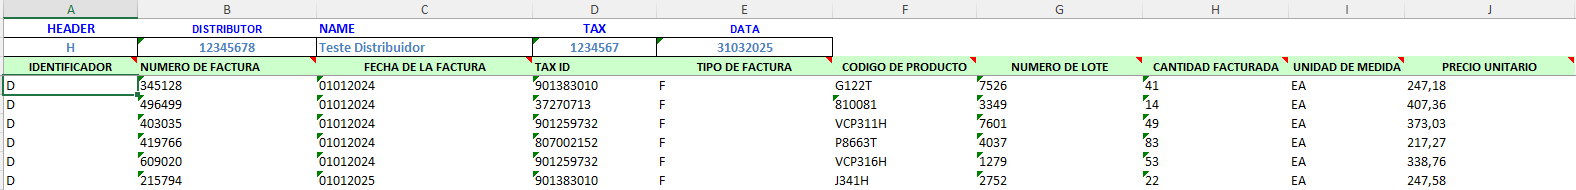

Para o código funcionar, é necessário instalar os seguintes pacotes:
- flask
- google-cloud-storage
- pandas

O código a seguir mostra o código desenvolvido em Flask para armazenamento dos dados no Cloud Storage e suas respectivas telas em HTML e CSS.

```Python
from flask import Flask, render_template, request # Biblioteca Flask para criação de um servidor web para a coleta dos dados
from google.cloud import storage # Biblioteca do google cloud para iniciar as trativas com o cloud Storage
import os
import pandas as pd # Biblioteca Pandas utilizado para manipular os dados
from io import BytesIO

# Definir a variável de ambiente no código
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "elite-mix-451813-f5-e45e608f8659.json"

# Criar o cliente do Cloud Storage
client = storage.Client()

app = Flask(__name__)

# Configuração do bucket do Google Cloud Storage
BUCKET_NAME = 'datacollect_mvp'

# Função para fazer upload do arquivo para o Google Cloud Storage
def upload_to_gcs(file):
    client = storage.Client()
    bucket = client.get_bucket(BUCKET_NAME)

    new_file, new_file_name = convert_xlsx_to_csv(file)
    
    # Definindo o caminho dentro do bucket (no caso, a "pasta" datacolect_mvp)
    blob = bucket.blob(f'{new_file_name}')

    blob.upload_from_file(new_file)
    return blob.public_url

def convert_xlsx_to_csv(file):
        # Usa BytesIO para transformar a string binária em um objeto de arquivo
    df = pd.read_excel(file, sheet_name=None, header=None)
    
    sheet_name = list(df.keys())[0]  # Pega o nome da primeira planilha
    df_sheet = df[sheet_name]

    # Separar as linhas em duas partes: a primeira linha (informações do distribuidor)
    # e a segunda linha (informações das faturas)
    distribuidor_info = df_sheet.iloc[1, :5].values.tolist() # Linha 2 (informações do distribuidor)
    factura_info = df_sheet.iloc[3:, :10].values.tolist()  # Linha 4 (informações da fatura)
    factura_info = [item + [file.filename] for item in factura_info]
    # Criar um DataFrame para as informações do distribuidor
    distribuidor_df = pd.DataFrame([distribuidor_info], columns=["HEADER","DISTRIBUTOR", "NAME", "TAX", "DATA"])

    # Criar um DataFrame para as informações das faturas
    factura_df = pd.DataFrame(factura_info, columns=["IDENTIFICADOR","NUMERO DE FACTURA", 
                                                      "FECHA DE LA FACTURA", 
                                                      "TAX ID", 
                                                      "TIPO DE FACTURA", 
                                                      "CODIGO DE PRODUCTO", 
                                                      "NUMERO DE LOTE", 
                                                      "CANTIDAD FACTURADA", 
                                                      "UNIDAD DE MEDIDA", 
                                                      "PRECIO UNITARIO",
                                                      "FILE NAME"])

    # Adicionar as informações do distribuidor em cada linha de fatura
    factura_df["IDENTIFICADOR"] = distribuidor_df["HEADER"].iloc[0]
    factura_df["CODIGO DEL DISTRIBUIDOR"] = distribuidor_df["DISTRIBUTOR"].iloc[0]
    factura_df["NOMBRE DEL DISTRIBUIDOR"] = distribuidor_df["NAME"].iloc[0]
    factura_df["FECHA DEL ARCHIVO"] = distribuidor_df["DATA"].iloc[0]
    factura_df["TAX ID DIST"] = distribuidor_df["TAX"].iloc[0]

    # Nome do arquivo CSV que será salvo no bucket datachangecsv
    csv_file_name = file.filename.replace('.xlsx', '.csv')

    # Convertendo o DataFrame para CSV no formato de string
    csv_data = factura_df.to_csv(index=False, encoding="utf-8")

    new_file = BytesIO(csv_data.encode('utf-8'))

    print(f'Arquivo CSV {csv_file_name} criado com sucesso no bucket datachangecsv!')

    return new_file, csv_file_name

# Configuração do Flask para renderização das páginas
@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "POST":
        file = request.files["file"]
        if file:
            file_url = upload_to_gcs(file)
            return render_template("confirmado.html")
    return render_template("index.html")

if __name__ == "__main__":
    app.run(debug=True)
```

**OBS.:** O código da renderização da página não poderá ser executado devido à necessidade da chave de autenticação com o Google cloud. O Github e o Google Cloud bloqueiam a chave caso ela seja compartilhada por fontes terceiras: 

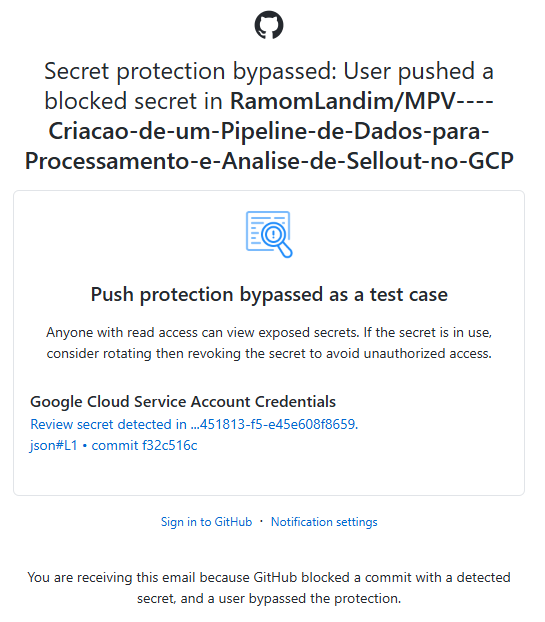
 
Porém, caso queira verificar como o site funciona, pode utilizar o notebook em Site/app.ipynb para testar a execução do código e suas funcionalidades

**Código HTML da página principal**

```html
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">  
    <title>Upload para Google Cloud Storage</title>
    <style> 
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
            font-family: Arial, sans-serif;
        }

        body {
            display: flex; 
            justify-content: center;
            align-items: center;
            height: 100vh;
            background: #f4f4f4; 
        }

        .upload-container {
            background: #fff;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.1);
            text-align: center;
        }

        h1 {
            margin-bottom: 20px;
            font-size: 20px;
            color: #333;
        }

        .file-input {
            display: none;
        }

        .custom-file-upload {
            display: flex;
            align-items: center;
            justify-content: center;
            gap: 10px;
            cursor: pointer;
            padding: 10px 20px;
            background: #007bff;
            color: white;
            border-radius: 5px;
            font-size: 16px;
            transition: 0.3s;
        }

        .custom-file-upload:hover {
            background: #0056b3;
        }

        .preview {
            margin-top: 15px;
            font-size: 14px;
            color: #555;
        }

        .submit-btn {
            margin-top: 20px;
            padding: 10px 20px;
            background: #28a745;
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 16px;
            cursor: pointer;
            transition: 0.3s;
        }

        .submit-btn:hover {
            background: #218838;
        }
    </style>
</head>
<body>
    <!-- Montagem do conteines principal -->
    <div class="upload-container">
        <h1>Envie seu arquivo</h1>
        <form action="/" method="POST" enctype="multipart/form-data">
            <label for="file-upload" class="custom-file-upload">
                📂 Escolher arquivo
            </label>
            <input type="file" id="file-upload" name="file" class="file-input" required>
            <p id="file-name" class="preview">Nenhum arquivo selecionado</p>
            <button type="submit" class="submit-btn">Enviar</button>
            </form>
    </div>
    <!-- Script para controle e funcionamento dos botões de envio e reset -->
    <script>
        const fileInput = document.getElementById('file-upload');
        const fileNameDisplay = document.getElementById('file-name');
        const submitBtn = document.getElementById('submit-btn');
        const resetBtn = document.getElementById('reset-btn');

        fileInput.addEventListener('change', function() {
            if (this.files[0]) {
                fileNameDisplay.textContent = this.files[0].name;
                submitBtn.disabled = false;
                resetBtn.disabled = false;
            } else {
                resetFields();
            }
        });

        resetBtn.addEventListener('click', function() {
            resetFields();
        });

        function resetFields() {
            fileInput.value = "";
            fileNameDisplay.textContent = "Nenhum arquivo selecionado";
            submitBtn.disabled = true;
            resetBtn.disabled = true;
        }
    </script>

</body>
</html>
```

**Página principal**

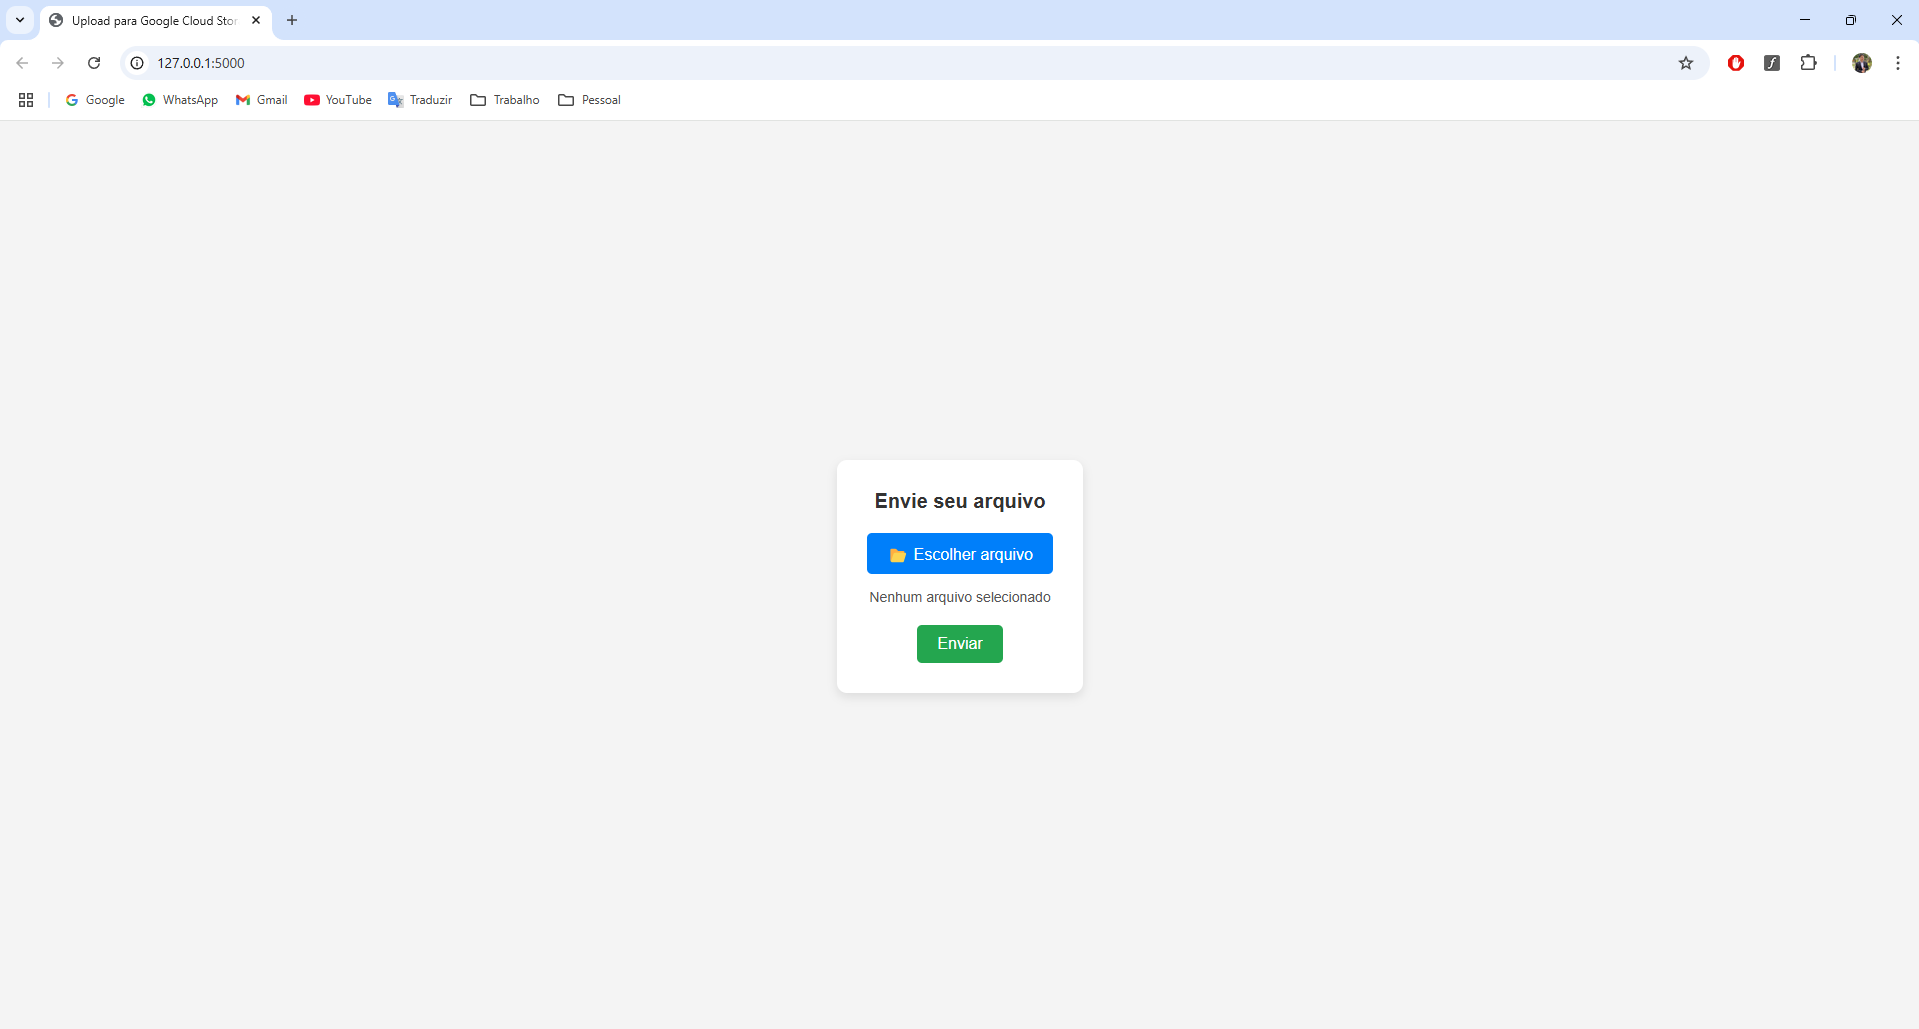

**Código HTML da página de confirmação**
```html
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Upload Concluído</title>
    <style>      
        * {
          margin: 0;
          padding: 0;
          box-sizing: border-box;
          font-family: Arial, sans-serif;}

        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background: #f4f4f4;
        }

        .success-container {
            background: #fff;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.1);
            text-align: center;
            animation: fadeIn 0.8s ease-in-out;
        }

        @keyframes fadeIn {
            from {
                opacity: 0;
                transform: scale(0.9);
            }
            to {
                opacity: 1;
                transform: scale(1);
            }
        }

        .success-icon {
            font-size: 50px;
            color: #28a745;
            animation: pop 0.5s ease-out;
        }
        .success-icon {
            font-size: 50px;
            color: #28a745;
            animation: pop 0.5s ease-out;
        }

        @keyframes pop {
            0% { transform: scale(0); opacity: 0; }
            80% { transform: scale(1.2); opacity: 1; }
            100% { transform: scale(1); }
        }

        h1 {
            margin-top: 15px;
            font-size: 22px;
            color: #333;
        }

        p {
            margin-top: 10px;
            font-size: 16px;
            color: #555;
        }

        .back-btn {
            margin-top: 20px;
            padding: 10px 20px;
            background: #007bff;
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 16px;
            cursor: pointer;
            transition: 0.3s;
            text-decoration: none;
            display: inline-block;
        }

        .back-btn:hover {
            background: #0056b3;
        }
    </style>
</head>
<body>
    <!-- Div para apresentação da confirmação de envio -->
    <div class="success-container">
        <div class="success-icon">✅</div> 
        <h1>Arquivo enviado com sucesso!</h1>
        <p>Seu arquivo foi processado e enviado para o Google Cloud Storage.</p>
        <!-- Botão para facilitar o envio de um novo arquivo -->
        <a href="/" class="back-btn">Enviar outro arquivo</a>
    </div>

</body>
</html>
```

**Página de confirmação**

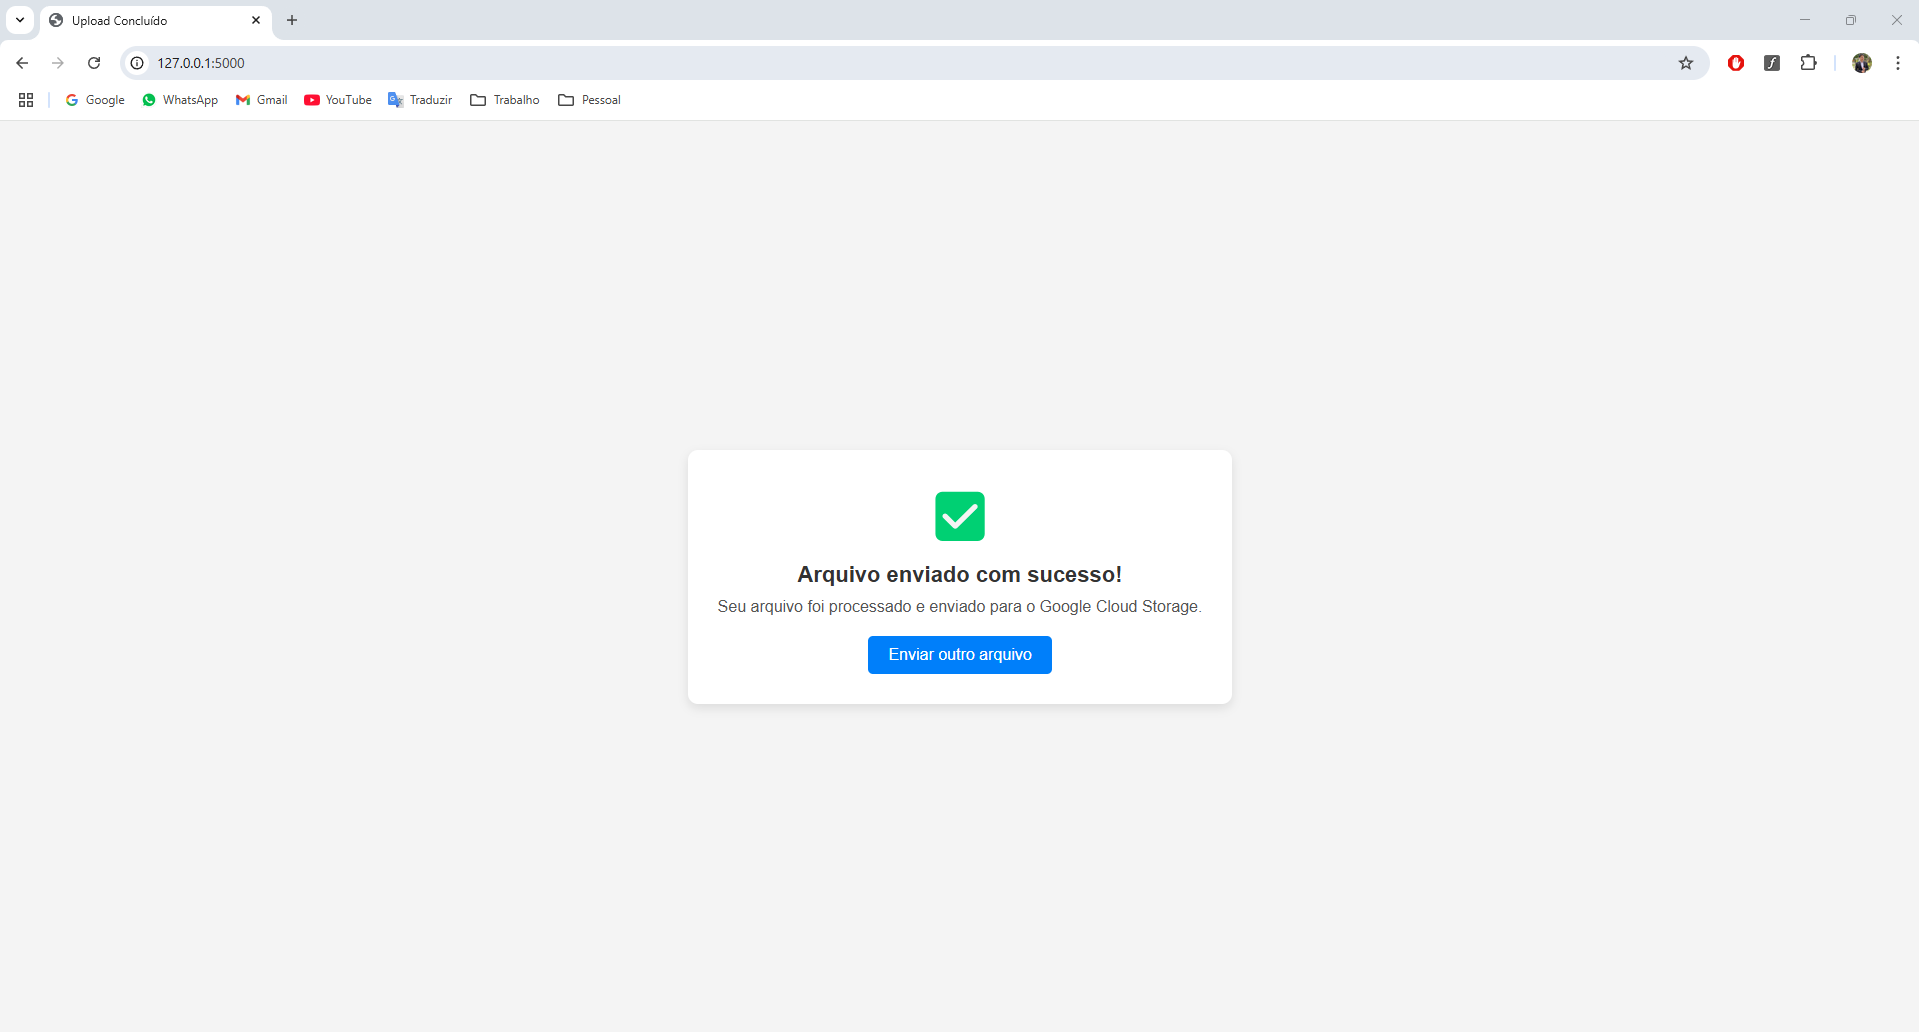

Após o envio do arquivo, os dados são armazenados no Google Cloud Storage já convertidos para .csv

## **Processamento dos dados**

### **Cloud Functions**
A Cloud Functions é um ambiente de execução sem servidor que permite criar e conectar serviços em nuvem. Atualmente, a Cloud Functions foi integrada ao serviço da Cloud Run. Ela permite aos desenvolvedores criar funções simples e com uma única finalidade. Essas funções são anexadas a eventos emitidos pela infraestrutura em nuvem e pelos serviços. 

O Cloud Functions pode ser usado para uma variedade de casos de uso, como: Processamento de dados, Detecção e resposta a eventos do Cloud Storage e Validação e transformação de dados. Essas funcionalidades foram as utilizadas no projeto. 

Além disso, para conhecimentos, outras finalidades como processamento de imagens e Transcodificação de vídeos, Invocação de qualquer serviço na Internet, Webhooks, APIs leves e etc

Para a utilização nessa etapa do projeto, foi implementado uma função para indentificação de um evento, ou seja, quando um novo arquivo entra no bucket do Storage, ser transferido a informação bruta para dentro de uma tabela da BigQuery (Nosso banco de dados).

### **Configurações iniciais do Cloud Functions**

Para iniciar, acessamos o módulo do Cloud Run e criar uma nova função, clicando em "Escrever uma função"
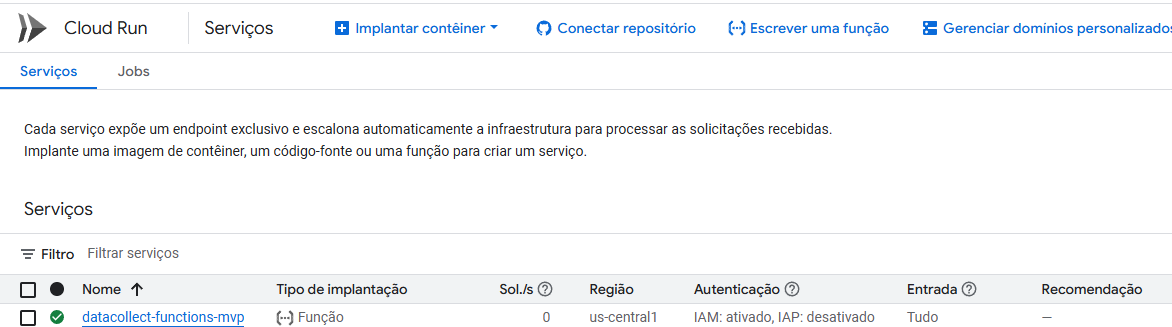


Ao clicar, uma tela para configuração incial da função é aberto

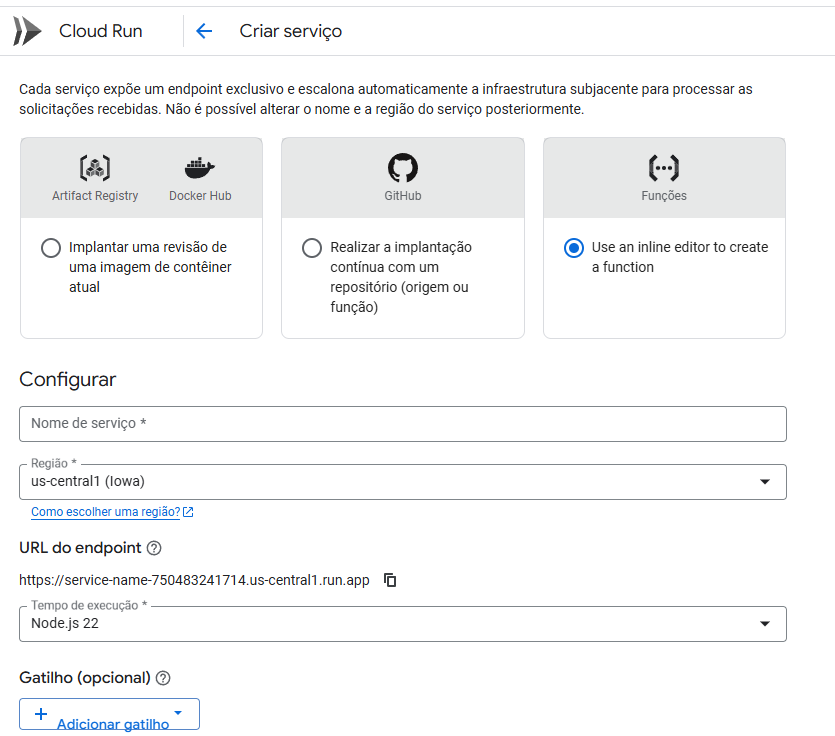

Nesta etapa, podemos selecionar:
- Local de onde o código será buscado. Nesse caso, foi implementado no próprio cloud run
- Nome da função
- Região, recomenda-se ser o mesmo do bucket da Cloud Storage
- Linguagem de execução, utilizamos Python 3.10
- Gatilho para chamar a função, aqui configuramos para o gatilho do Cloud Storage

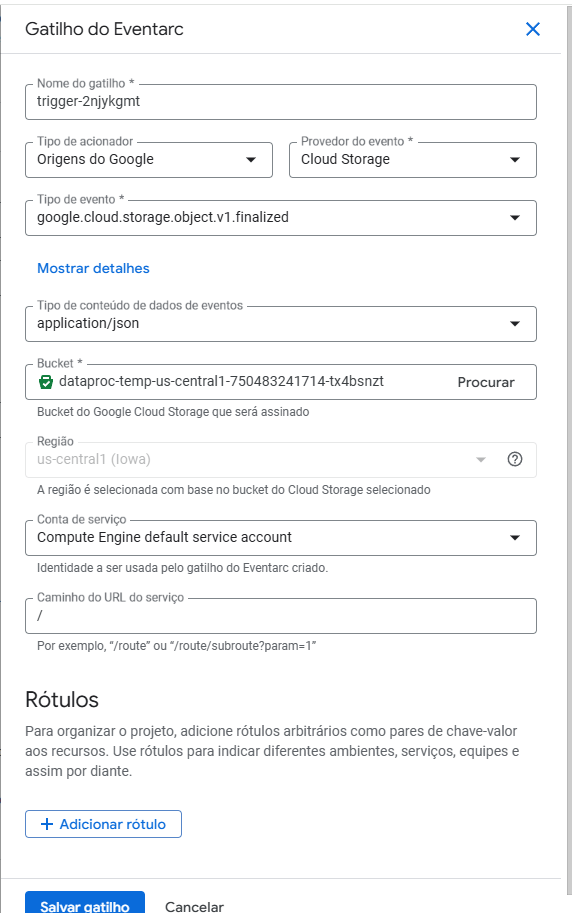
- Outras funções como tipo de autenticação, faturamento, escalonamento e entrada

Após a criação da função, iremos abrir a tela para demais configurações:
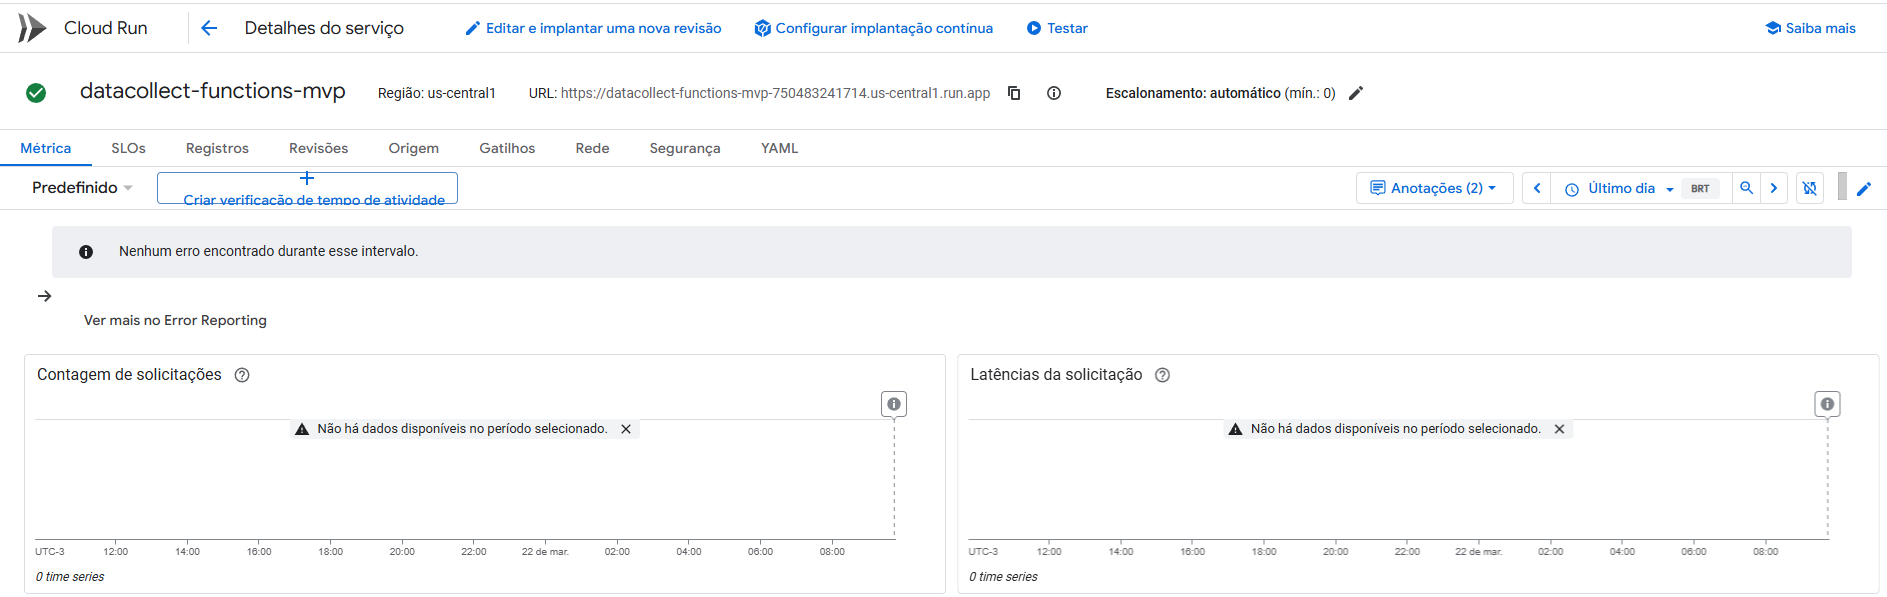

Vamos para tela de origem onde iremos configurar o código de execução da função em si.

Nesta página podemos colocar o script para ser executado a determinado gatilho. Nesse caso, a função escrita será: Assim que um arquivo for recebido no Cloud Storage, verifica se os campos estão com os tipos de dados e qualidade minima esperada e armazena na camada **layer_l0** na tabela **l0_sellout** quando o dado for aceito, caso ocorra algum erro na validação se tem um registro de log na tabela **logs_erros** também no layer_l0 para as linhas que estão com erros. O Script Python é o seguinte:

```python
# Importação das bibliotecas
from google.cloud import bigquery # Biblioteca para conexão com o BigQuery
import functions_framework # Framework necessário para ativar a função no Cloud Run, com essa tag a function sabe onde deverá executar
import pandas as pd # Biblioteca Pandas para validação do Data frames
import io # Biblioteca padrão do Python para leitura de arquivos
from google.cloud import storage # Biblioteca para conexão com o Cloud Storage

# Definição do schema esperado
EXPECTED_SCHEMA = {
    "IDENTIFICADOR": "STRING",
    "NUMERO DE FACTURA": "INTEGER",
    "FECHA DE LA FACTURA": "INTEGER",
    "TAX ID": "INTEGER",
    "TIPO DE FACTURA": "STRING",
    "CODIGO DE PRODUCTO": "STRING",
    "NUMERO DE LOTE": "INTEGER",
    "CANTIDAD FACTURADA": "INTEGER",
    "UNIDAD DE MEDIDA": "STRING",
    "PRECIO UNITARIO": "FLOAT",
    "FILE NAME": "STRING",
    "CODIGO DEL DISTRIBUIDOR": "INTEGER",
    "NOMBRE DEL DISTRIBUIDOR": "STRING",
    "FECHA DEL ARCHIVO": "INTEGER",
    "TAX ID DIST": "INTEGER",
}

# Nome do dataset e tabelas
DATASET_ID = "layer_l0"
TABLE_ID = "l0_sellout"
LOG_TABLE_ID = "logs_erros"

# Função para validação dos dados
def validate_schema(df):
    errors = [] # Array para armazenamento das linhas com erros
    
    for col, expected_type in EXPECTED_SCHEMA.items():
        if col not in df.columns: # Validação estrutural do arquivo
            errors.append(f"Coluna ausente: {col}")
            continue

        # Validação dos tipos de dados
        if expected_type == "INTEGER":
            if not pd.api.types.is_numeric_dtype(df[col]):
                errors.append(f"{col} deveria ser INTEGER, mas veio {df[col].dtype}")
            elif df[col].isnull().any():
                errors.append(f"{col} contém valores nulos")
            elif (df[col] < 0).any():
                errors.append(f"{col} contém valores negativos inválidos")

        elif expected_type == "FLOAT":
            if not pd.api.types.is_float_dtype(df[col]):
                errors.append(f"{col} deveria ser FLOAT, mas veio {df[col].dtype}")
            elif df[col].isnull().any():
                errors.append(f"{col} contém valores nulos")
            elif (df[col] < 0).any():
                errors.append(f"{col} contém valores negativos inválidos")

        elif expected_type == "STRING":
            if not pd.api.types.is_object_dtype(df[col]):
                errors.append(f"{col} deveria ser STRING, mas veio {df[col].dtype}")
            elif df[col].isnull().any():
                errors.append(f"{col} contém valores nulos")

        # Validação para datas no formato DDMMYYYY
        if col in ["FECHA DE LA FACTURA", "FECHA DEL ARCHIVO"]:
            df[col] = df[col].astype(str).str.zfill(8)  # Garante que tenha 8 caracteres
    
            for index, value in df[col].items():
                if not value.isdigit() or len(value) != 8: #Valida tamanho da Data
                    errors.append(f"Linha {index + 2}: {col} contém caracteres inválidos")
                    continue

                day, month, year = int(value[:2]), int(value[2:4]), int(value[4:])

                if not (1 <= month <= 12): # Valida Mês
                    errors.append(f"Linha {index + 2}: {col} tem mês inválido ({month})")
                    continue

                if not (1 <= day <= 31): # Valida dia
                    errors.append(f"Linha {index + 2}: {col} tem dia inválido ({day})")
                    continue

                # Verifica dias válidos para cada mês
                if month in [4, 6, 9, 11] and day > 30:
                    errors.append(f"Linha {index + 2}: {col} tem dia inválido ({day}) para o mês {month}")
                elif month == 2:
                # Verifica se é ano bissexto
                    is_leap = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)
                    if (is_leap and day > 29) or (not is_leap and day > 28):
                        errors.append(f"Linha {index + 2}: {col} tem dia inválido ({day}) para fevereiro {year}")

    return errors

@functions_framework.cloud_event
def ingest_csv(cloud_event):
    # Função acionada quando um novo CSV é enviado ao Cloud Storage.
    client = bigquery.Client() # conexão com o BigQuery
    storage_client = storage.Client() # Conexão com a Cloud Storage
    
    bucket_name = cloud_event.data["bucket"] # Conexão com o bucket do Cloud Storage
    file_name = cloud_event.data["name"] # Coleta do arquivo que foi carregado
    uri = f"gs://datacollect_mvp/{file_name}" # Coleta o caminho do arquivo que foi carregado
    
    print(f"Processando o arquivo: {file_name}") # Confirmação no log do Cloud Run para validação se o arquivo foi encontrado

    # Download do arquivo para validar schema
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(file_name)
    content = blob.download_as_text()
    
    # Carrega o CSV em um DataFrame Pandas
    df = pd.read_csv(io.StringIO(content))

    # Valida schema na função de validação
    errors = validate_schema(df)
    if errors:
        print(f"Erro de schema no arquivo {file_name}: {errors}")

        # Registra erro no BigQuery no caminho: layer_l0.logs_erros
        # O Registro e dos erros do arquivo, no qual será armazenado: Nome do arquivo, erros e data do erro
        log_data = [{"file_name": file_name, "error_message": error} for error in errors]
        log_table_ref = f"{DATASET_ID}.{LOG_TABLE_ID}"
        client.insert_rows_json(log_table_ref, log_data)
        
        return
    
    # Configuração do job de carregamento
    job_config = bigquery.LoadJobConfig(
        source_format=bigquery.SourceFormat.CSV,
        skip_leading_rows=1,  # Pula o cabeçalho
        write_disposition="WRITE_APPEND", # Adiciona a nova informação na tabela sem deletar o que já existia
        schema=[ bigquery.SchemaField("IDENTIFICADOR", "STRING"), # Configuração do schema para armazenamento no BigQuery
            bigquery.SchemaField("NUMERO DE FACTURA", "INTEGER"),
            bigquery.SchemaField("FECHA DE LA FACTURA", "INTEGER"),
            bigquery.SchemaField("TAX ID", "INTEGER"),
            bigquery.SchemaField("TIPO DE FACTURA", "STRING"),
            bigquery.SchemaField("CODIGO DE PRODUCTO", "STRING"),
            bigquery.SchemaField("NUMERO DE LOTE", "INTEGER"),
            bigquery.SchemaField("CANTIDAD FACTURADA", "INTEGER"),
            bigquery.SchemaField("UNIDAD DE MEDIDA", "STRING"),
            bigquery.SchemaField("PRECIO UNITARIO", "FLOAT"),
            bigquery.SchemaField("FILE NAME", "STRING"),
            bigquery.SchemaField("CODIGO DEL DISTRIBUIDOR", "INTEGER"),
            bigquery.SchemaField("NOMBRE DEL DISTRIBUIDOR", "STRING"),
            bigquery.SchemaField("FECHA DEL ARCHIVO", "INTEGER"),
            bigquery.SchemaField("TAX ID DIST", "INTEGER")]
    )

    # Iniciar o job de carregamento
    load_job = client.load_table_from_uri(uri, f"{DATASET_ID}.{TABLE_ID}", job_config=job_config)
    load_job.result()  # Aguarda o término

    print(f"Arquivo {file_name} carregado com sucesso para {DATASET_ID}.{TABLE_ID}")

```

Notamos também a necessidade de adicionar os requirements.txt, para garantir que o Cloud Functions consiga instalar corretamente as bibliotecas necessárias para execução do projeto, no nosso caso será:
- google-cloud-bigquery
- google-cloud-storage
- functions-framework
- pandas

Após colocar o código e o requirements na aba de origem, configuramos a função para chamar a função ingest_csv e clicamos no botão salvar e reimplementar:
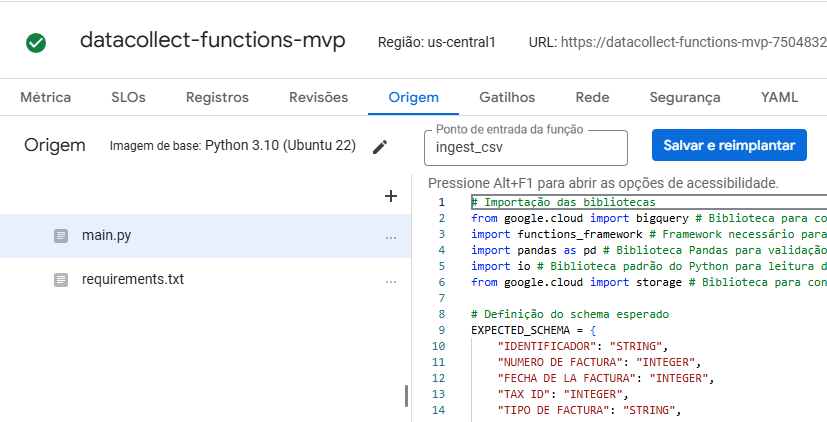

Será aberto uma haba onde podemos verificar se não houve erros de compilação:

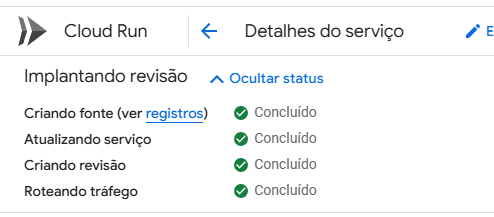

Assim que tudo concluido, podemos constuir nossas tabelas dentro do BigQuery.

**OBS.:** Da mesma maneira que o código de criação do site, deixo separado na pasta jobs/main.ipynb para que possa apresentar a funcionalidade desse script.

### **BigQuery**

Uma breve introdução sobre o BigQuery, ele é uma ferramenta do Google Cloud Platform (GCP) que permite armazenar e analisar dados em escala. É um data warehouse corporativo gerenciado e sem servidor. 

Ao abri o BigQuery, encontramos uma página como essa:
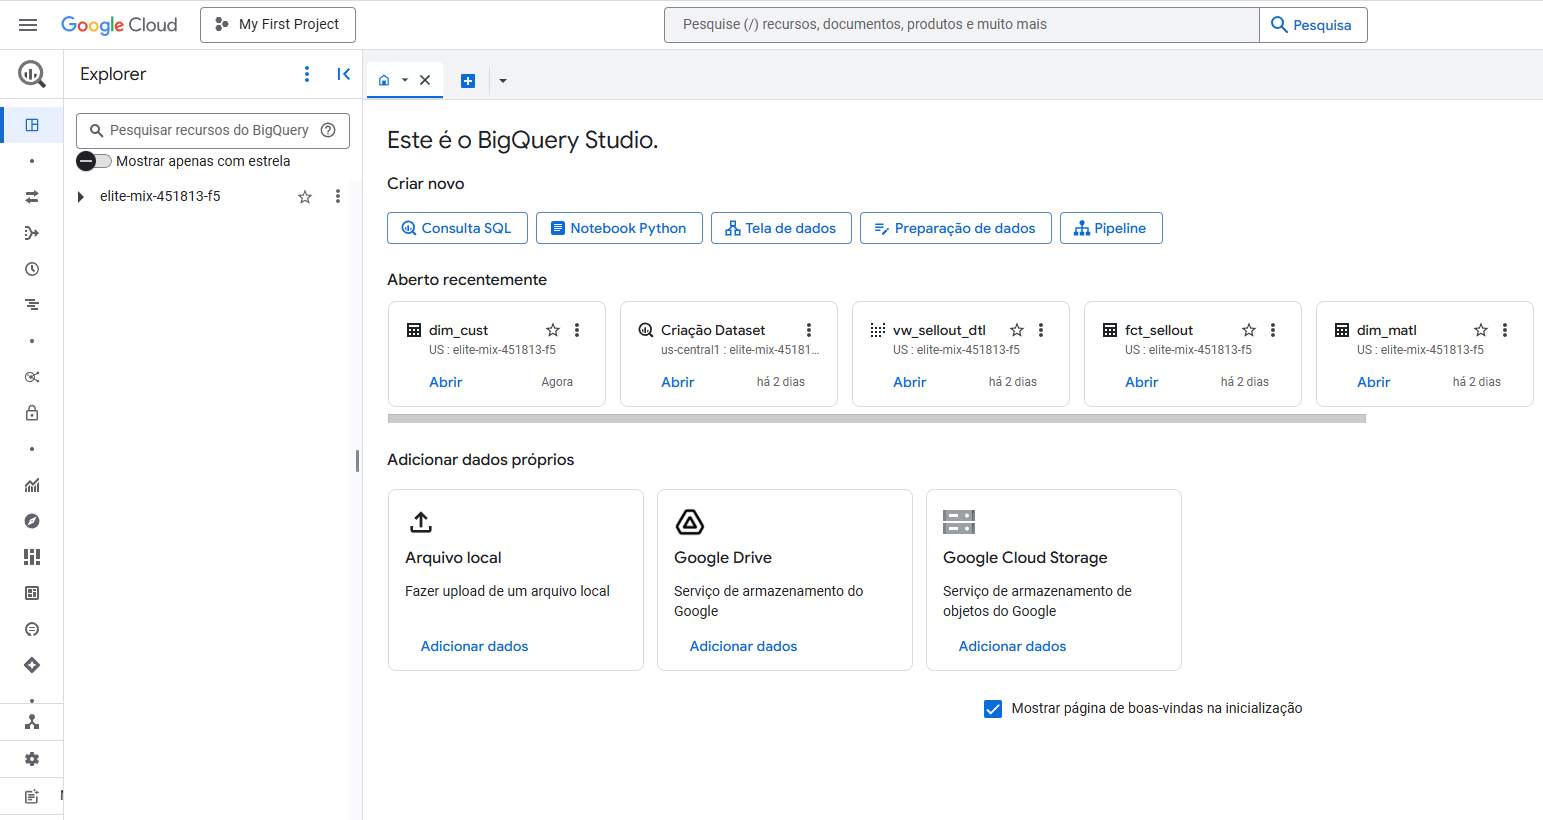

Dentro do BigQuery, podemos realizar a criação inicialmente do nosso Data Set, neste projeto iremos separar em diferentes camadas e separar os datasets em layer_l0, layer_l1 e layer_view, com isso temos uma estratégia de governança de dados e boas práticas em engenharia de dados. Essa abordagem organiza os dados conforme seu nível de processamento e confiabilidade, onde:

- layer_l0: Teremos os dados brutos, da maneira que foi recebidos, na camada de l0 teremos
    - l0_sellout: Tabela de armazenamento dos dados que foram carregados pelo usuário, sem qualquer tipo de tratamento.
    - logs_erros: Logs dos erros que foram encontrado no arquivo.
    - matl_ext: Tabela bruta das informações dos materiais, futuramente vindo de um ERP
    - cust_ext: Tabela bruta das informações dos distribuidores e clientes indiretos, futuramente vindo de um ERP

- layer_l1: Teremos nossas tabelas com um pequeno tratamento nos dados originais, as tabelas de dimenssões e a criação de uma tabela Fato
    - sellout: Tabela espelho dos dados que foram recebidos, com pequenas correções em tipos de dados e nome de colunas
    - dim_cust: Tabela dimensão para dados dos clientes e distribuidores
    - dim_matl: Tabela dimensão dos materiais
    - dim_time: Tabela dimensão do tempo
    - fct_sellout: Tabela fato dos dados de sellout, incluindo as chaves surrogate das dimensões
- layer_view: layer para armazenamento do visões desejada pelo negócio
    - vw_sellout_dtl: view para facilitar a consulta e alimentação dos dados no Power BI

#### **Criação de data sets**
No BigQuery, vamos iniciar uma nova consulta para realizar a criação dos Data Sets (assim chamado no BigQuery, similar a SCHEMAS)  

- layer_l0
```SQL
CREATE SCHEMA IF NOT EXISTS `elite-mix-451813-f5.layer_l0`
OPTIONS (
  location = 'us-central1'
);
```
- layer_l1
```SQL
CREATE SCHEMA IF NOT EXISTS `elite-mix-451813-f5.layer_l1`
OPTIONS (
  location = 'us-central1'
);
```
- layer_view
```SQL
CREATE SCHEMA IF NOT EXISTS `elite-mix-451813-f5.layer_view`
OPTIONS (
  location = 'us-central1'
);
```

#### **Criação das Tabelas**

Agora vamos criar todas as tabelas necessárias para o projeto

- layer_l0.l0_sellout: Tabela para salvar os dados brutos sendo similar como foi recebido
```SQL
CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l0.l0_sellout` (
  `IDENTIFICADOR` STRING,
  `NUMERO DE FACTURA` INT64,
  `FECHA DE LA FACTURA` INT64,
  `TAX ID` INT64,
  `TIPO DE FACTURA` STRING,
  `CODIGO DE PRODUCTO` STRING,
  `NUMERO DE LOTE` INT64,
  `CANTIDAD FACTURADA` INT64,
  `UNIDAD DE MEDIDA` STRING,
  `PRECIO UNITARIO` FLOAT64,
  `FILE NAME` STRING,
  `CODIGO DEL DISTRIBUIDOR` INT64,
  `NOMBRE DEL DISTRIBUIDOR` STRING,
  `FECHA DEL ARCHIVO` INT64,
  `TAX ID DIST` INT64
);
```
- layer_l0.logs_erros
```SQL
CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l0.logs_erros` (
    file_name STRING,
    error_message STRING,
    error_timestamp TIMESTAMP DEFAULT CURRENT_TIMESTAMP()
);
```
- layer_l0.matl_ext
```SQL
CREATE OR REPLACE EXTERNAL TABLE `elite-mix-451813-f5.layer_l0.matl_ext`
OPTIONS (
  format = 'CSV',
  uris = ['gs://tabdimensoes/dim_matl.csv'],
  skip_leading_rows = 1,
  field_delimiter = ';',
  quote = '"'
);
```
- layer_l0.cust_ext
```SQL
CREATE OR REPLACE EXTERNAL TABLE `elite-mix-451813-f5.layer_l0.cust_ext`
OPTIONS (
  format = 'CSV',
  uris = ['gs://tabdimensoes/dim_cust.csv'],
  skip_leading_rows = 1,
  field_delimiter = ',',
  quote = '"'
);
```

- layer_l1.dim_matl
```SQL
CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l1.dim_matl` (
    matl_srgt_key STRING,
    codigo_producto STRING,
    material_description STRING,
    franchise_name STRING,
    sub_franchise_code STRING,
    subfranchise_name STRING,
    major_code STRING,
    major_description STRING,
    minor_code STRING,
    minor_description STRING
);
```
- layer_l1.dim_time: 
```SQL
CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l1.dim_time` AS
WITH dates AS (
    SELECT DATE('2024-01-01') + INTERVAL n DAY AS date_day
    FROM UNNEST(GENERATE_ARRAY(0, 730)) AS n  -- Gera 2 anos de datas (2024-01-01 até 2026-01-01)
)
SELECT 
    GENERATE_UUID() AS time_srgt_key,  -- Chave substituta sequencial
    FORMAT_DATE('%Y%m%d', date_day) AS date_key,  -- Chave natural da data (YYYYMMDD)
    date_day AS full_date,                      -- Data completa
    EXTRACT(YEAR FROM date_day) AS year,
    EXTRACT(QUARTER FROM date_day) AS quarter,
    EXTRACT(MONTH FROM date_day) AS month,
    FORMAT_DATE('%B', date_day) AS month_name,
    EXTRACT(WEEK FROM date_day) AS week_of_year,
    EXTRACT(DAY FROM date_day) AS day_of_month,
    EXTRACT(DAYOFWEEK FROM date_day) AS day_of_week,
    FORMAT_DATE('%A', date_day) AS day_name,
    IF(EXTRACT(DAYOFWEEK FROM date_day) IN (1,7), 'Weekend', 'Weekday') AS day_type,
    EXTRACT(YEAR FROM date_day) * 100 + EXTRACT(WEEK FROM date_day) AS year_week,
    EXTRACT(YEAR FROM date_day) * 100 + EXTRACT(MONTH FROM date_day) AS year_month,
    DATE_TRUNC(date_day, MONTH) AS first_day_of_month,
    DATE_TRUNC(date_day, QUARTER) AS first_day_of_quarter,
    DATE_TRUNC(date_day, YEAR) AS first_day_of_year
FROM dates;
```

- layer_l1.dim_cust
```SQL
CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l1.dim_cust` (
    cust_srgt_key STRING,
    tax_id STRING,
    cust_cd STRING,
    cust_1_nm STRING,
    city_nm STRING,
    st_cd STRING,
    ctry_nm STRING,
    type_desc STRING
);
```

- layer_l1.sellout
```SQL
CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l1.sellout` AS
    select sl.IDENTIFICADOR as indentificador,
    sl.`NUMERO DE FACTURA` as numero_de_fatura,
    LPAD(CAST(sl.`FECHA DE LA FACTURA` AS STRING), 8, '0') as data_fatura,
    sl.`TAX ID` as tax_id,
    sl.`TIPO DE FACTURA` as tipo_de_fatura,
    sl.`CODIGO DE PRODUCTO`  as codigo_de_produto,
    sl.`NUMERO DE LOTE` as numero_de_lote,
    case when sl.`TIPO DE FACTURA` = "D" then sl.`CANTIDAD FACTURADA` * -1 else sl.`CANTIDAD FACTURADA` end as quantidade_faturada,
    sl.`UNIDAD DE MEDIDA` as unidade_de_medida, 
    case when sl.`TIPO DE FACTURA` = "D" then sl.`PRECIO UNITARIO` * -1 else sl.`PRECIO UNITARIO` end as preco_unitario, 
    sl.`FILE NAME` as file_name, 
    sl.`CODIGO DEL DISTRIBUIDOR` as codigo_do_distribuidor,
    sl.`NOMBRE DEL DISTRIBUIDOR` as nome_do_distribuidor, 
    sl.`FECHA DEL ARCHIVO` as data_do_arquivo,
    sl.`TAX ID DIST` as tax_id_dist
    from `elite-mix-451813-f5.layer_l0.l0_sellout` as sl
```

- layer_l1.fct_sellout
```SQL
CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l1.fct_sellout` as
SELECT GENERATE_UUID() AS fato_srgt_sellout, 
      dc_2.cust_srgt_key as dist_sgrt_key,
      dc.cust_srgt_key as indirect_sgrt_key,
      mt.matl_srgt_key as matl_srgt_key,
      dt.time_srgt_key as time_srgt_key,
      DATE(CONCAT(SUBSTR(sl.data_fatura, 5, 4), '-',SUBSTR(sl.data_fatura, 3, 2), '-',SUBSTR(sl.data_fatura, 1, 2))) as data_fatura,
      sl.tax_id,
      sl.numero_de_lote,
      sl.numero_de_fatura,
      sl.codigo_de_produto,
      sl.quantidade_faturada,
      sl.preco_unitario,
      case when sl.tipo_de_fatura = "D" then (-1*sl.quantidade_faturada * sl.preco_unitario) else (sl.quantidade_faturada * sl.preco_unitario) end as preco_total,
      sl.unidade_de_medida
from `elite-mix-451813-f5.layer_l1.sellout` as sl
left join `elite-mix-451813-f5.layer_l1.dim_cust` as dc on dc.tax_id = CAST(sl.tax_id as STRING)
left join `elite-mix-451813-f5.layer_l1.dim_cust` as dc_2 on dc_2.tax_id = CAST(sl.tax_id_dist as STRING)
left join `elite-mix-451813-f5.layer_l1.dim_matl` as mt on mt.codigo_producto = sl.codigo_de_produto
left join `elite-mix-451813-f5.layer_l1.dim_time` as dt on dt.date_key = CONCAT(substr(sl.data_fatura, 5, 4),substr(sl.data_fatura, 3, 2), substr(sl.data_fatura, 1, 2))
```

- layer_view.vw_sellout_dtl
```SQL
CREATE OR REPLACE VIEW `elite-mix-451813-f5.layer_view.vw_sellout_dtl` AS
SELECT dt.year as calendar_year,
       dt.month as calendar_month,
       dc.cust_cd as distributor_system_code,
       dc.cust_1_nm as distributor_name,
       dc.st_cd as distributor_contry_code,
       dc.ctry_nm as distributor_contry_name,
       sl.tax_id,
       dc_2.cust_1_nm as indirect_name,
       dc_2.cust_cd as indirect_system_code,
       dc_2.ctry_nm as indirect_country_name,
       dc_2.st_cd as indirect_state_name,
       dc_2.city_nm as indirect_city_name,
       sl.numero_de_fatura as invoice_number,
       sl.data_fatura as invoice_date,
       sl.codigo_de_produto as product_code,
       dm.material_description,
       dm.franchise_name,
       dm.sub_franchise_code,
       dm.subfranchise_name as sub_franchise_name,
       dm.major_code,
       dm.major_description,
       dm.minor_code,
       dm.minor_description,
       sl.quantidade_faturada as quantity_invoiced,
       sl.preco_unitario as unit_price,
       sl.preco_total as total_price
FROM `elite-mix-451813-f5.layer_l1.fct_sellout` sl
left join `elite-mix-451813-f5.layer_l1.dim_cust` dc on dc.cust_srgt_key = sl.dist_sgrt_key
left join `elite-mix-451813-f5.layer_l1.dim_cust` dc_2 on dc_2.cust_srgt_key = sl.indirect_sgrt_key
left join `elite-mix-451813-f5.layer_l1.dim_matl` dm on dm.matl_srgt_key = sl.matl_srgt_key
left join `elite-mix-451813-f5.layer_l1.dim_time` dt on dt.time_srgt_key = sl.time_srgt_key
```


#### **Atualização dos Dados**

Após a criação das tabelas, vamos para a parte de atualização dos dados de maneira automática. Para isso iremos utilizar uma função do próprio BigQuery chamado Consultas Programadas.

No BigQuery, montaremos as querys de atualização e programar para que elas sejam executadas em determinados momentos.
Ao abrir uma nova consulta, iremos criar uma programação nas querys necessárias ser atualizadas, para isso clicamos no botão Programação e iremos configurar os horarios:
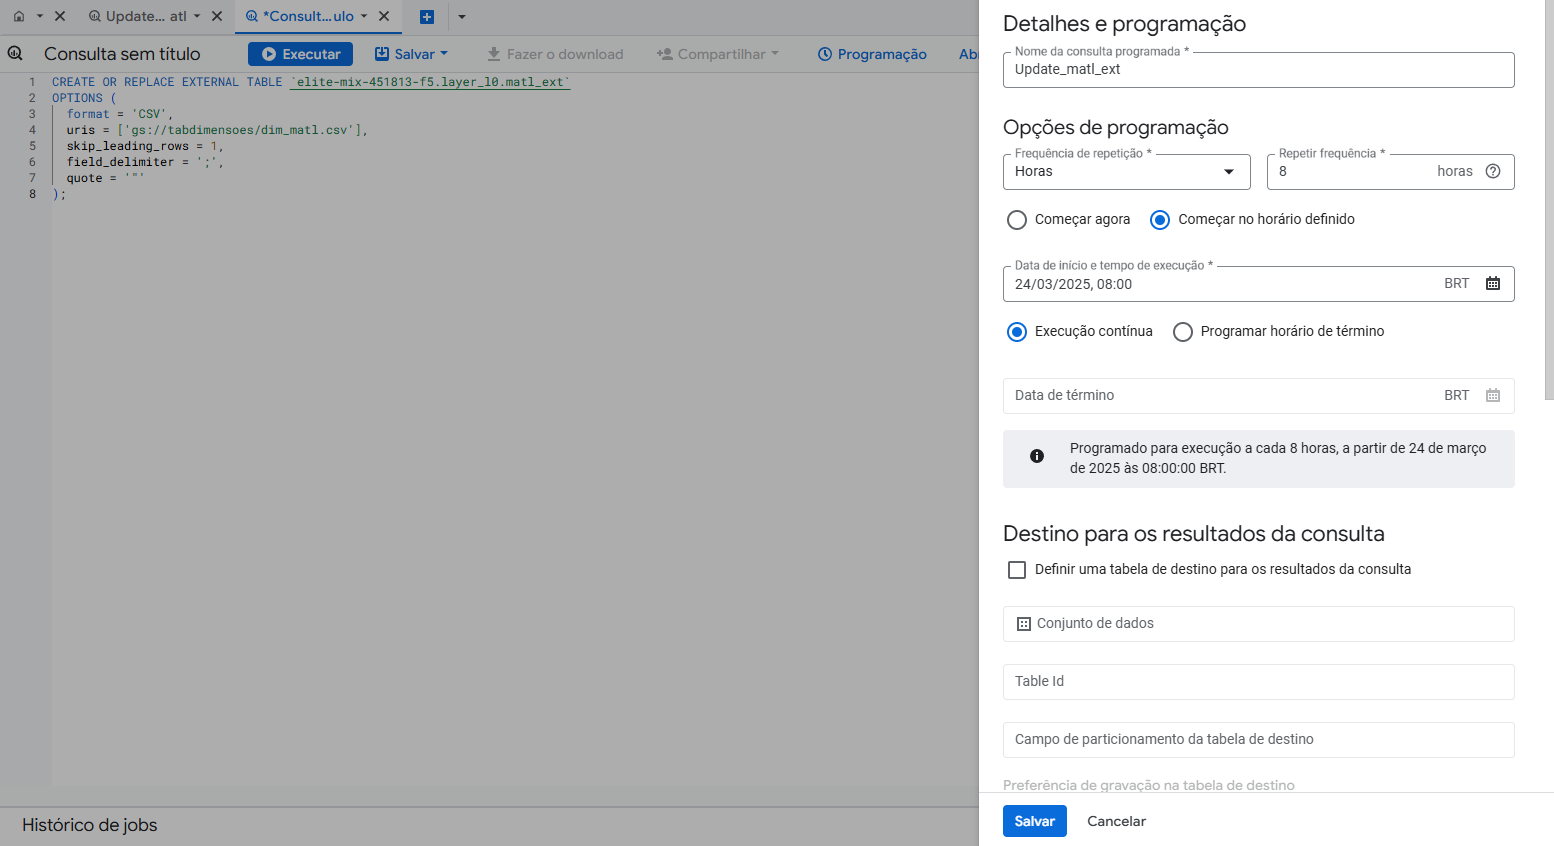

A atualização seguirá a seguinte logica:
- Atualização do Layer_l0
  - Atualização em tempo real da tabela l0_sellout: Automatizado com a ingestão do Cloud Run descrito anteriormente
  - Atualização em tempo real da tabela logs_erros: Automatizado com a ingestão do Cloud Run descrito anteriormente
  - Atualização da tabela matl_ext: A mesma de criação pois sempre irá atualizar com os novos dados do "ERP"
    ```SQL
    CREATE OR REPLACE EXTERNAL TABLE `elite-mix-451813-f5.layer_l0.matl_ext`
      OPTIONS (
      format = 'CSV',
      uris = ['gs://tabdimensoes/dim_matl.csv'],
      skip_leading_rows = 1,
      field_delimiter = ';',
      quote = '"'
    );
    ```
  - Atualização da tabela cust_ext: A mesma de criação, pois sempre irá atualizar com os novos dados do "ERP"
    ```SQL
    CREATE OR REPLACE EXTERNAL TABLE `elite-mix-451813-f5.layer_l0.cust_ext`
      OPTIONS (
      format = 'CSV',
      uris = ['gs://tabdimensoes/dim_cust.csv'],
      skip_leading_rows = 1,
      field_delimiter = ',',
      quote = '"'
    );
    ```
- Atualização do Layer_l1:
  - Atualização da tabela dim_matl: Insert into da tabela bruta da layer_l0.matl_ext
  ```SQL
  DELETE FROM `elite-mix-451813-f5.layer_l1.dim_matl` WHERE TRUE;
    INSERT INTO `elite-mix-451813-f5.layer_l1.dim_matl`
      SELECT 
        GENERATE_UUID() AS SurrogateKey,
        matl_cd,
        matl_desc,
        franchise_name,
        LPAD(CAST(sub_franchise_code AS STRING), 4, '0')  as sub_franchise_code, --Manter todos as sub franquias em String com 4 carcteres
        subfranchise_name,
        LPAD(CAST(major_code AS STRING), 4, '0')  as major_code, --Manter todos os major code em String com 4 carcteres
        major_description,
        LPAD(CAST(minor_code AS STRING), 6, '0')  as minor_code, --Manter todos os minor code em String com 6 carcteres
        minor_descr
        FROM `elite-mix-451813-f5.layer_l0.matl_ext`;
  ```
  - Atualização da tabela dim_cust: Insert into da tabela bruta da layer_l0.cust_ext
  ```SQL
  DELETE FROM `elite-mix-451813-f5.layer_l1.dim_cust` WHERE TRUE;
    INSERT INTO `elite-mix-451813-f5.layer_l1.dim_cust`
      SELECT 
        GENERATE_UUID() AS cust_srgt_key,
        CAST(tax_id AS STRING) as tax_id, --Manter todos tax id em String
        CAST(cust_cd AS STRING) as cust_cd, --Manter todos cust_cd em String
        cust_1_nm,
        city_nm,
        st_cd, 
        ctry_nm, 
        type_desc
        FROM `elite-mix-451813-f5.layer_l0.cust_ext`;
  ```
  - Atualização da tabela dim_time: Insert into apartir da maior data da tabela, adicionando sempre 1 dia por dia
  ```SQL
  INSERT INTO `elite-mix-451813-f5.layer_l1.dim_time`
    SELECT 
      GENERATE_UUID() AS time_srgt_key,  
      FORMAT_DATE('%Y%m%d', DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS date_key,  
      DATE_ADD(MAX(full_date), INTERVAL 1 DAY) AS full_date,                      
      EXTRACT(YEAR FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS year,
      EXTRACT(QUARTER FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS quarter,
      EXTRACT(MONTH FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS month,
      FORMAT_DATE('%B', DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS month_name,
      EXTRACT(WEEK FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS week_of_year,
      EXTRACT(DAY FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS day_of_month,
      EXTRACT(DAYOFWEEK FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS day_of_week,
      FORMAT_DATE('%A', DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS day_name,
      IF(EXTRACT(DAYOFWEEK FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) IN (1,7), 'Weekend', 'Weekday') AS day_type,
      EXTRACT(YEAR FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) * 100 + EXTRACT(WEEK FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS year_week,
      EXTRACT(YEAR FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) * 100 + EXTRACT(MONTH FROM DATE_ADD(MAX(full_date), INTERVAL 1 DAY)) AS year_month,
      DATE_TRUNC(DATE_ADD(MAX(full_date), INTERVAL 1 DAY), MONTH) AS first_day_of_month,
      DATE_TRUNC(DATE_ADD(MAX(full_date), INTERVAL 1 DAY), QUARTER) AS first_day_of_quarter,
      DATE_TRUNC(DATE_ADD(MAX(full_date), INTERVAL 1 DAY), YEAR) AS first_day_of_year
    FROM `elite-mix-451813-f5.layer_l1.dim_time`;
  ```
  - Atualização da tabela sellout: Insert into da tabela bruta da layer_l0.sellout, corrigindo principalmente os nomes, o 0 inicial da data da fatura para datas de 1 a 9 (01, 02, ..., 09) e a conversão das devoluções multiplicando por -1
  ```SQL
  CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l1.sellout` AS
    select sl.IDENTIFICADOR as indentificador,
      sl.`NUMERO DE FACTURA` as numero_de_fatura,
      LPAD(CAST(sl.`FECHA DE LA FACTURA` AS STRING), 8, '0') as data_fatura,
      sl.`TAX ID` as tax_id,
      sl.`TIPO DE FACTURA` as tipo_de_fatura,
      sl.`CODIGO DE PRODUCTO`  as codigo_de_produto,
      sl.`NUMERO DE LOTE` as numero_de_lote,
      case when sl.`TIPO DE FACTURA` = "D" then sl.`CANTIDAD FACTURADA` * -1 else sl.`CANTIDAD FACTURADA` end as quantidade_faturada,
      sl.`UNIDAD DE MEDIDA` as unidade_de_medida, 
      case when sl.`TIPO DE FACTURA` = "D" then sl.`PRECIO UNITARIO` * -1 else sl.`PRECIO UNITARIO` end as preco_unitario, 
      sl.`FILE NAME` as file_name, 
      sl.`CODIGO DEL DISTRIBUIDOR` as codigo_do_distribuidor,
      sl.`NOMBRE DEL DISTRIBUIDOR` as nome_do_distribuidor, 
      sl.`FECHA DEL ARCHIVO` as data_do_arquivo,
      sl.`TAX ID DIST` as tax_id_dist
    from `elite-mix-451813-f5.layer_l0.l0_sellout` as sl
  ```
  - Atualização da tabela fct_sellout: Criação da tabela Fato, unificando todas as tabelas com suas repectivas surrogate codes
  ```SQL
  CREATE OR REPLACE TABLE `elite-mix-451813-f5.layer_l1.fct_sellout` as
    SELECT GENERATE_UUID() AS fato_srgt_sellout, 
      dc_2.cust_srgt_key as dist_sgrt_key,
      dc.cust_srgt_key as indirect_sgrt_key,
      mt.matl_srgt_key as matl_srgt_key,
      dt.time_srgt_key as time_srgt_key,
      DATE(CONCAT(SUBSTR(sl.data_fatura, 5, 4), '-',SUBSTR(sl.data_fatura, 3, 2), '-',SUBSTR(sl.data_fatura, 1, 2))) as data_fatura,
      sl.tax_id,
      sl.numero_de_lote,
      sl.numero_de_fatura,
      sl.codigo_de_produto,
      sl.quantidade_faturada,
      sl.preco_unitario,
      case when sl.tipo_de_fatura = "D" then (-1*sl.quantidade_faturada * sl.preco_unitario) else (sl.quantidade_faturada * sl.preco_unitario) end as preco_total,
      sl.unidade_de_medida
    from `elite-mix-451813-f5.layer_l1.sellout` as sl
    left join `elite-mix-451813-f5.layer_l1.dim_cust` as dc on dc.tax_id = CAST(sl.tax_id as STRING)
    left join `elite-mix-451813-f5.layer_l1.dim_cust` as dc_2 on dc_2.tax_id = CAST(sl.tax_id_dist as STRING)
    left join `elite-mix-451813-f5.layer_l1.dim_matl` as mt on mt.codigo_producto = sl.codigo_de_produto
    left join `elite-mix-451813-f5.layer_l1.dim_time` as dt on dt.date_key = CONCAT(substr(sl.data_fatura, 5, 4),substr(sl.data_fatura, 3, 2), substr(sl.data_fatura, 1, 2))
  ```
- Atualização do layer_view
  - Atualização da tabela vw_sellout_dtl: Atualização da View que será consumida pelo Power BI
  ```SQL
  CREATE OR REPLACE VIEW `elite-mix-451813-f5.layer_view.vw_sellout_dtl` AS
    SELECT dt.year as calendar_year,
       dt.month as calendar_month,
       dc.cust_cd as distributor_system_code,
       dc.cust_1_nm as distributor_name,
       dc.st_cd as distributor_contry_code,
       dc.ctry_nm as distributor_contry_name,
       sl.tax_id,
       dc_2.cust_1_nm as indirect_name,
       dc_2.cust_cd as indirect_system_code,
       dc_2.ctry_nm as indirect_country_name,
       dc_2.st_cd as indirect_state_name,
       dc_2.city_nm as indirect_city_name,
       sl.numero_de_fatura as invoice_number,
       sl.data_fatura as invoice_date,
       sl.codigo_de_produto as product_code,
       dm.material_description,
       dm.franchise_name,
       dm.sub_franchise_code,
       dm.subfranchise_name as sub_franchise_name,
       dm.major_code,
       dm.major_description,
       dm.minor_code,
       dm.minor_description,
       sl.quantidade_faturada as quantity_invoiced,
       sl.preco_unitario as unit_price,
       sl.preco_total as total_price
    FROM `elite-mix-451813-f5.layer_l1.fct_sellout` sl
    left join `elite-mix-451813-f5.layer_l1.dim_cust` dc on dc.cust_srgt_key = sl.dist_sgrt_key
    left join `elite-mix-451813-f5.layer_l1.dim_cust` dc_2 on dc_2.cust_srgt_key = sl.indirect_sgrt_key
    left join `elite-mix-451813-f5.layer_l1.dim_matl` dm on dm.matl_srgt_key = sl.matl_srgt_key
    left join `elite-mix-451813-f5.layer_l1.dim_time` dt on dt.time_srgt_key = sl.time_srgt_key
  ```

Após a configuração dos horario de atualização, as consultas ficaram programadas para executar da seguinte maneira:
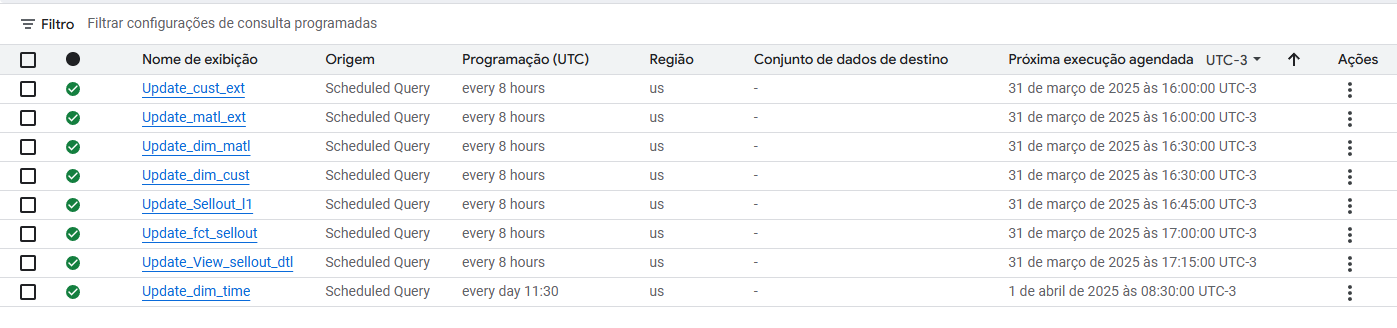

Com as configurações realizadas, o data lake esta pronto para receber dados.


### **Upload dos dados**

Para testar e validar o pipeline de dados, foi utilizado uma pequena amostra de produtos da Johnson & Johnson, empresa na qual trabalho. Além disso, foi criado uma catálogo de Clientes/Distribuidores como nomes fictícios. Além disso desenvolvemos um script de geração de dados aleatórios de vendas, criando dados fictícios para que possamos simular cenários reais e permitindo a verificação da estrutura e funcionamento do processo de ingestão no BigQuery.

A tabela de Materiais está estruturada da seguinte maneira:

In [1]:
# Caso não tenha o pandas
!pip install pandas

In [2]:
import pandas as pd

df = pd.read_csv('Arquivos/tabdimensoes/dim_matl.csv',delimiter=";")

with pd.option_context('display.max_rows', None,):
    print(df)

    matl_cd                                 matl_desc franchise_name  \
0      163T            ETHILON* BLK 3-0 45CM (1)SC-24        Ethicon   
1      184T              SILK*BLACK 3-0 45CM (1)SC-24        Ethicon   
2      185T              SILK*BLACK 2-0 45CM (1)SC-26        Ethicon   
3    411962  SURGICEL FIBRILLAR 2INX4IN(5.1CMX10.2CM)        Ethicon   
4      627H                 ETHLN BLK 30IN 3-0 S/A KS        Ethicon   
5      628H           ETHILON SUTURE 30(75CM) 2-0 BLK        Ethicon   
6    810081                    GYNECARE TVT OBTURATOR        Ethicon   
7      810T             CATGUT CHROM 3-0 70CM (1)CT-1        Ethicon   
8     8114T            PROLENE*BLUE 5-0 45CM (1)SC-16        Ethicon   
9      811T             CATGUT CHROM 2-0 70CM (1)CT-1        Ethicon   
10    8183T            PROLENE*BLUE 4-0 45CM (1)SC-20        Ethicon   
11    8184T            PROLENE*BLUE 3-0 45CM (1)SC-24        Ethicon   
12    8185T            PROLENE*BLUE 2-0 45CM (1)SC-26        Eth

A tabela de Clientes/Distribuidor ficou da seguinte maneira:

In [3]:
import pandas as pd

df_cust = pd.read_csv('Arquivos/tabdimensoes/dim_cust.csv',delimiter=",",encoding='latin-1')

with pd.option_context('display.max_rows', None,):
    print(df_cust)

        tax_id   cust_cd                    cust_1_nm         city_nm st_cd  \
0    890503532  12000001            Hospital Santa Fé       São Paulo    SP   
1    901383010  12000002          Hospital Vida Plena  Belo Horizonte    MG   
2   1090441783  12000003           Clínica São Rafael        Curitiba    PR   
3    807000799  12000004           Hospital Esperança    Porto Alegre    RS   
4    901326028  12000005           Hospital São Lucas       Fortaleza    CE   
5    890500309  12000006       Hospital Santo Antônio        Salvador    BA   
6    890500060  12000007            Clínica Nova Vida          Recife    PE   
7    901259732  12000008       Hospital Nossa Senhora        Brasília    DF   
8   1127351035  12000009         Hospital Santa Clara        Campinas    SP   
9     91495445  12000010         Hospital São Vicente         Goiânia    GO   
10   900282439  12000011          Hospital do Coração   Florianópolis    SC   
11   901400425  12000012       Hospital Vida Saudáve

Para simular os dados, foram gerados cinco arquivos, cada um representando um distribuidor fictício. Os dados foram criados de forma aleatória, garantindo variação nos valores e permitindo a validação do pipeline de ingestão.

Os distribuidores simulados são:
- AmazoMed Distribuidora
- BioVida Medical
- Medibrasil Equipamentos
- NordClin Soluções Médicas
- SanTech Hospitalar

O script utilizado para a geração desses dados foi o seguinte:

In [14]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Definir intervalo de datas para FECHA DE LA FACTURA
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 3, 31)

# Criar número aleatório de faturas entre 50 e 100
num_faturas = random.randint(1000, 1600)

# Lista de TAX ID para INDIRECT
tax_ids_indirect = [
    "890503532", "901383010", "1090441783", "807000799", "901326028", "890500309",
    "890500060", "901259732", "1127351035", "91495445", "900282439", "901400425",
    "900508891", "37270713", "900075758", "88160599", "830008300", "807002152",
    "901222235", "1090521375", "900017916"
]

# Lista de códigos de produto da dim_matl
matl_cd_list = [
    "163T", "184T", "185T", "411962", "627H", "628H", "810081", "810T", "8114T",
    "811T", "8183T", "8184T", "8185T", "8411T", "8423T", "8424T", "8425H", "843T",
    "8622H", "8623H", "8833T", "9003G", "923T", "924T", "925T", "9522T", "9557T",
    "G122T", "G123T", "G323T", "HAR36", "J122H", "J304H", "J317H", "J341H",
    "J570G", "JP493G", "K831H", "K832H", "K833H", "K834H", "K845H", "LT200",
    "LT300", "M8702T", "MCP426H", "MCP427H", "MS0002", "P640T", "P8663T",
    "P8682T", "P8686T", "P8697T", "P8698T", "SA84T", "SA85T", "U203T", "UML1",
    "VCP304H", "VCP311H", "VCP316H", "VCP317H", "VCP318H", "VCP335H", "VCP339H",
    "VCP340H", "VCP341H", "VCP345H", "VCP346H", "VCP347H", "VR9922G", "VR9923G",
    "W31G", "XYPMH1", "Y427H", "Z316H", "Z317H", "Z346H"
]

# Preços médios dos produtos
precos_produtos = {
    "163T": 200.00, "184T": 150.00, "185T": 180.00, "411962": 220.00, "627H": 100.00,
    "628H": 110.00, "810081": 350.00, "810T": 300.00, "8114T": 450.00, "811T": 380.00,
    "8183T": 250.00, "8184T": 255.00, "8185T": 270.00, "8411T": 500.00, "8423T": 450.00,
    "8424T": 470.00, "8425H": 500.00, "843T": 350.00, "8622H": 120.00, "8623H": 130.00,
    "8833T": 175.00, "9003G": 210.00, "923T": 190.00, "924T": 180.00, "925T": 200.00,
    "9522T": 160.00, "9557T": 180.00, "G122T": 250.00, "G123T": 230.00, "G323T": 240.00,
    "HAR36": 160.00, "J122H": 220.00, "J304H": 210.00, "J317H": 230.00, "J341H": 240.00,
    "J570G": 180.00, "JP493G": 250.00, "K831H": 260.00, "K832H": 270.00, "K833H": 280.00,
    "K834H": 290.00, "K845H": 300.00, "LT200": 350.00, "LT300": 370.00, "M8702T": 420.00,
    "MCP426H": 430.00, "MCP427H": 440.00, "MS0002": 150.00, "P640T": 180.00, "P8663T": 200.00,
    "P8682T": 210.00, "P8686T": 220.00, "P8697T": 230.00, "P8698T": 240.00, "SA84T": 280.00,
    "SA85T": 290.00, "U203T": 310.00, "UML1": 320.00, "VCP304H": 350.00, "VCP311H": 360.00,
    "VCP316H": 370.00, "VCP317H": 380.00, "VCP318H": 390.00, "VCP335H": 400.00, "VCP339H": 410.00,
    "VCP340H": 420.00, "VCP341H": 430.00, "VCP345H": 440.00, "VCP346H": 450.00, "VCP347H": 460.00,
    "VR9922G": 250.00, "VR9923G": 260.00, "W31G": 270.00, "XYPMH1": 280.00, "Y427H": 290.00,
    "Z316H": 300.00, "Z317H": 310.00, "Z346H": 320.00
}

# Gerar dados das faturas
faturas_data = []
for _ in range(num_faturas):
    factura_num = random.randint(100000, 999999)  # Número aleatório de fatura
    fecha_factura = (start_date + timedelta(days=random.randint(0, (end_date - start_date).days))).strftime("%d%m%Y")
    tax_id = random.choice(tax_ids_indirect)
    cod_produto = random.choice(matl_cd_list)
    
    # Preço dentro de uma variação de ±20% em torno do preço médio
    preco_base = precos_produtos[cod_produto]
    variacao = random.uniform(0.8, 1.2)
    precio_unitario = round(preco_base * variacao, 2)
    
    lote = random.randint(1000, 9999)  # Número de lote aleatório
    cantidad = random.randint(1, 100)  # Quantidade faturada aleatória

    faturas_data.append(["D", factura_num, fecha_factura, tax_id, "F", cod_produto, lote, cantidad, "EA", precio_unitario])

# Criar DataFrame
faturas_df = pd.DataFrame(faturas_data, columns=[
    "IDENTIFICADOR", "NUMERO DE FACTURA", "FECHA DE LA FACTURA", "TAX ID", "TIPO DE FACTURA",
    "CODIGO DE PRODUCTO", "NUMERO DE LOTE", "CANTIDAD FACTURADA", "UNIDAD DE MEDIDA", "PRECIO UNITARIO"
])

with pd.option_context('display.max_rows', None,):
    print(faturas_df)

     IDENTIFICADOR  NUMERO DE FACTURA FECHA DE LA FACTURA      TAX ID  \
0                D             591089            06122024   900282439   
1                D             920909            07032024   901383010   
2                D             749816            16052024  1090521375   
3                D             453545            18032024   900017916   
4                D             729477            29102024   830008300   
5                D             390202            09022024  1090521375   
6                D             879267            29092024  1090521375   
7                D             158967            21122024   900282439   
8                D             556497            06022024   900017916   
9                D             880541            07072024   900508891   
10               D             362287            07012025   890500060   
11               D             500071            03032024   900282439   
12               D             840112            16

Agora com os dados gerados, iremos armazena-los conforme descrito anteriormente utilizando o portal Web e alimentar o BigQuery para apresentação dos dados e responder nossas perguntas.

Imagem do Bucket do Cloud Storage:

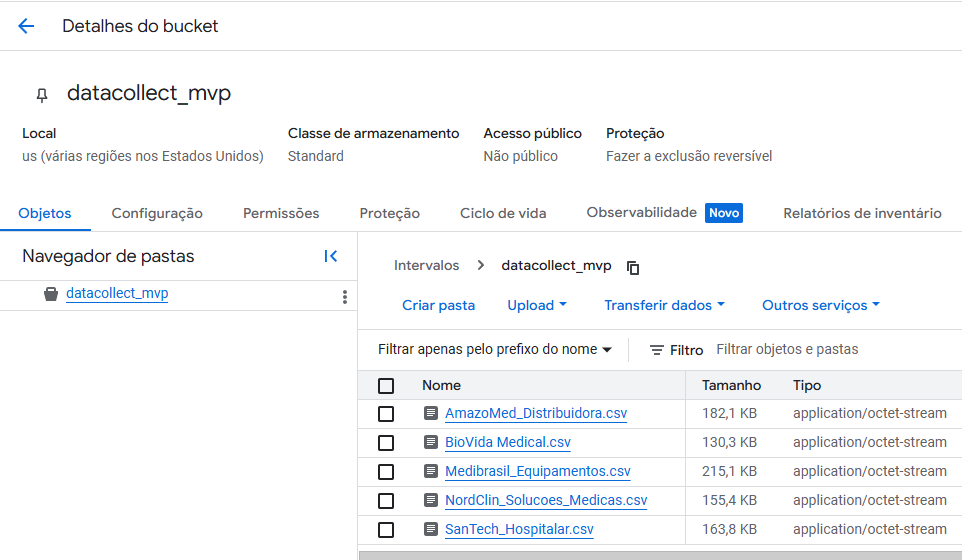

Imagem do Cloud Run confirmando o processamento:

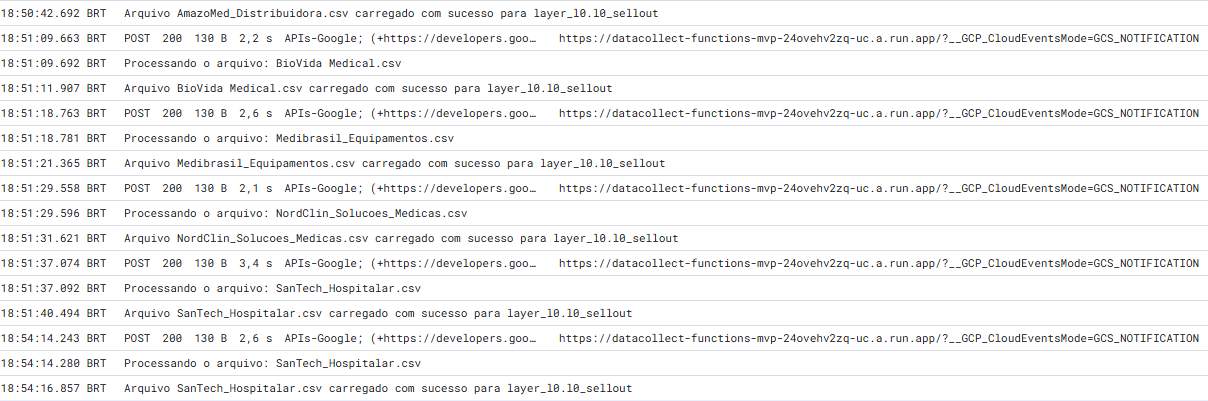

Imagem da camada l0 com os dados armazenados:

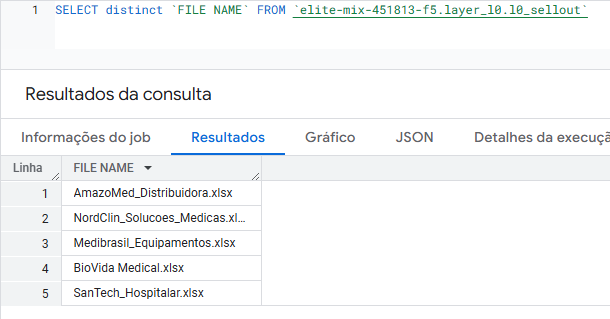

## **Apresentação dos dados**

Com os dados armazenados e já diponíveis na ultima camada de view, iremos criar um dashboard em Power BI Desktop para responder nossas perguntas.

Dentro do Power BI, vamos importar nossa base de dados, clicando em importar base de dados e selecionando Google BigQuery. É necessário realizar a autenticação com a conta google que tenha permissões no projeto:

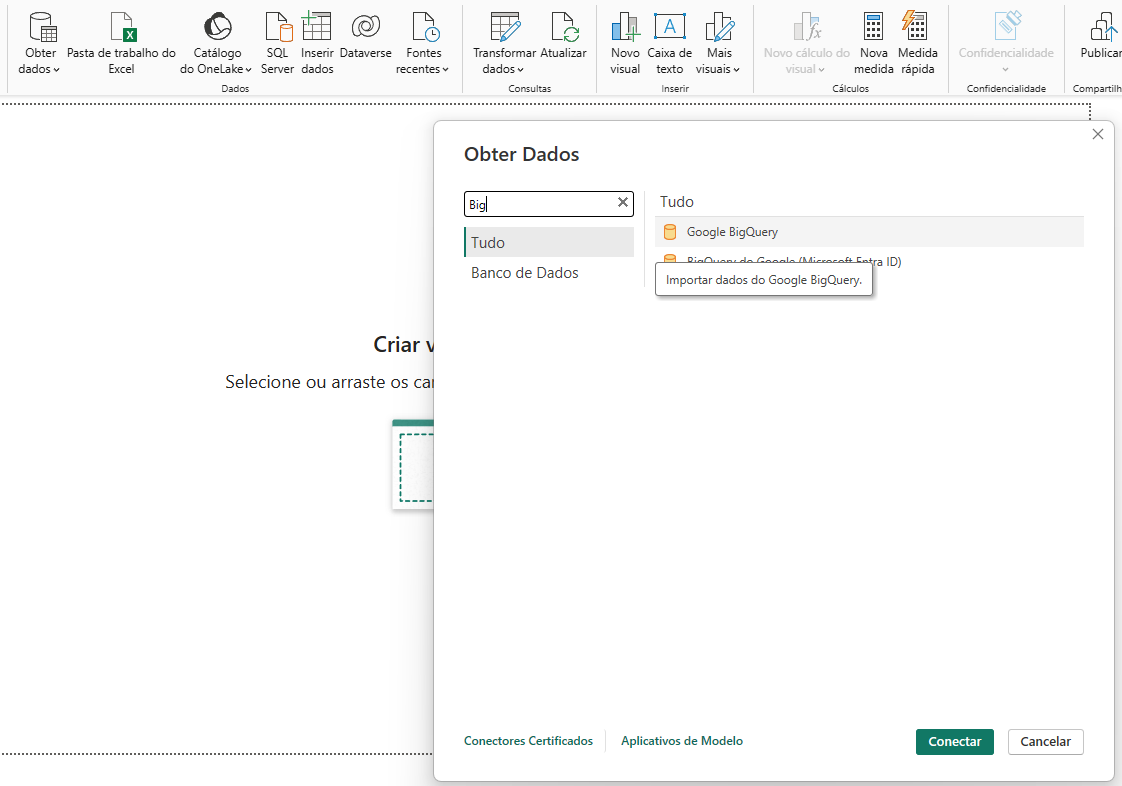

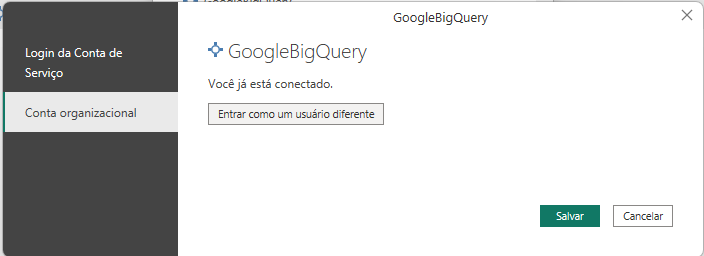

Após a configuração inicial, vamos realizar a query para extração da view para construção do nosso dashboard:

```SQL
    select * from `elite-mix-451813-f5.layer_view.vw_sellout_dtl`
```

Aplicaremos tambem uma pequena regra de negócio para facilitar na ordenação dos dados no Power BI. Abrindo o editor power Query, realizamos a criação de duas colunas:
- Month_new: Uma coluna com o 0 na frente dos meses de 1 a 9
- Year_month: Uma coluna concatenado o Ano com o Mês e separando por -

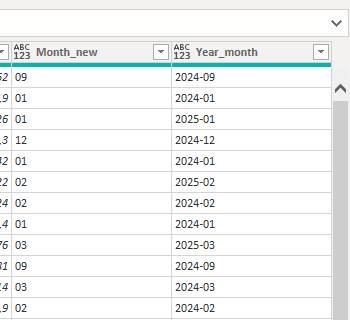

Com a finalização do power query, iremos montar nosso dashboard

### **Dashboard**

A criação do dashboard foi focado em responder a perguntas que foi informadas no inicio do projeto, nas quais são:
1. Qual foi o produto mais vendido em termos de valor?
2. Qual é o total de vendas (Sellout) no período?
3. Qual foi a quantidade total de produtos vendidos?
4. Quais são os top 5 produtos mais vendidos em valor?
5. Qual o desempenho de um produto específico?
6. Quais distribuidores venderam mais?
7. Quanto cada distribuidor vendeu por mês?
8. Qual foi o mês com maior faturamento total?
9. Há uma queda ou aumento nas vendas recentes?

Com isso, desenvolvemos o seguinte Power BI:

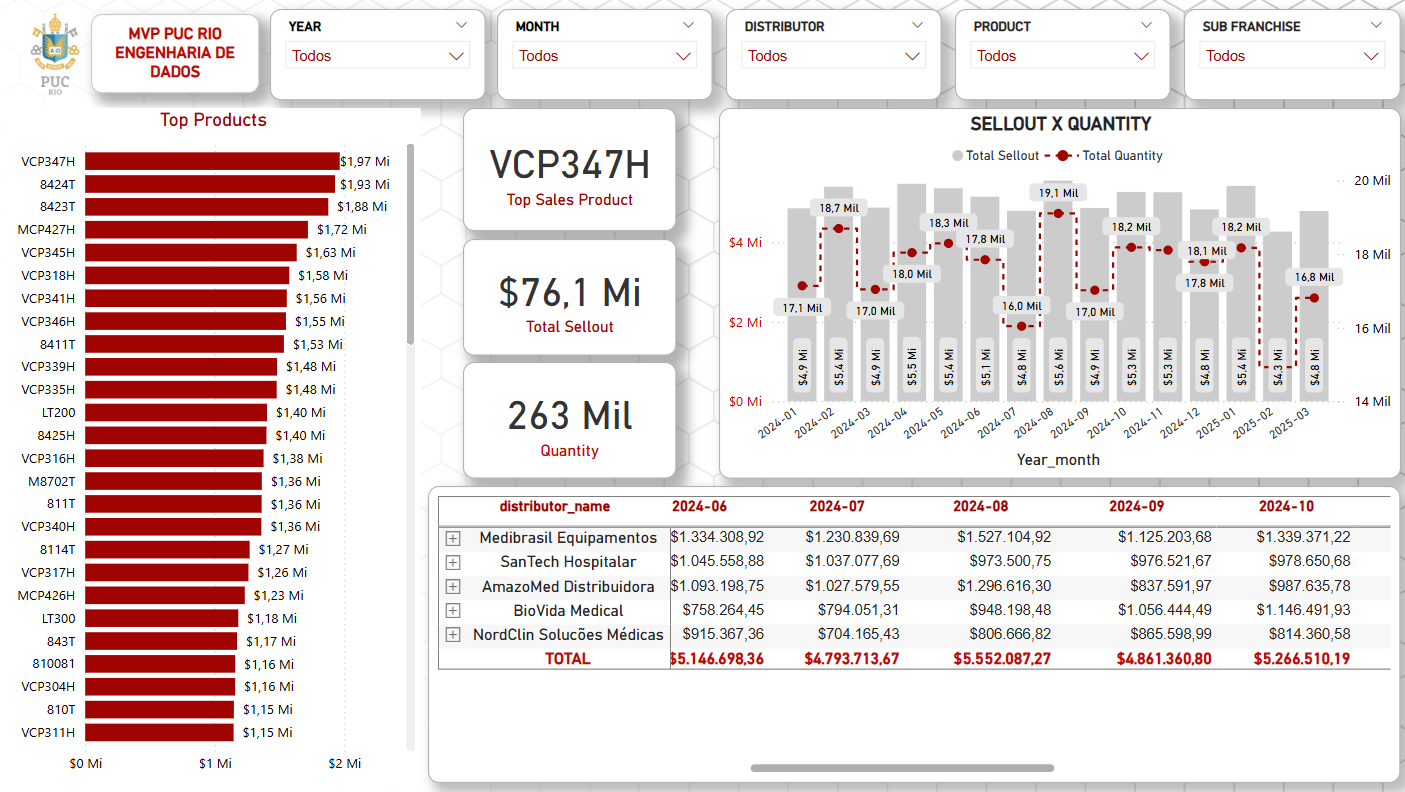

Onde temos:
- Filtros para facilitar as consutas:
    - Year: Filtro por ano

    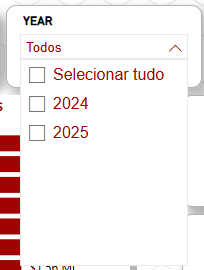

    - Month: Filtro por mês:

    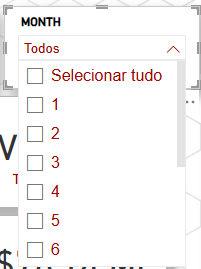

    - Distributor: Filtro para selecionar um ou vários distribuidores específicos:

    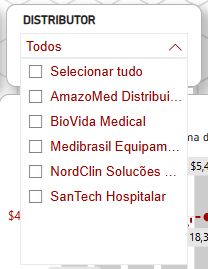

    - Product: Filtro para selecionar um ou vários produtos específicos:
    
    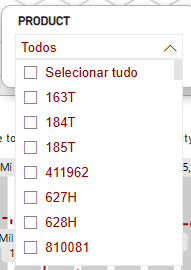

    - Sub Franchise: Filtro para selecionar uma ou várias subfranquias:

    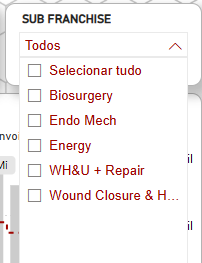 
- Gráfico Lateral para classificar a venda dos produtos decrescentes:

    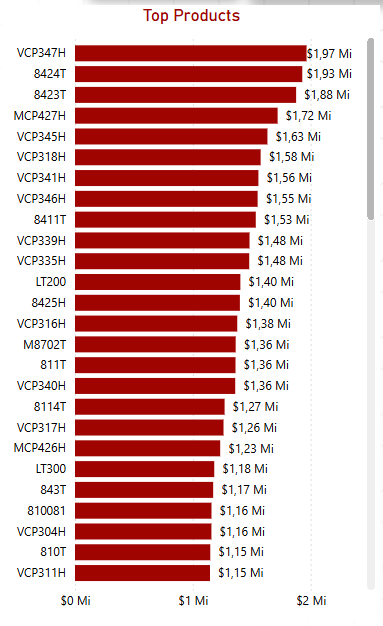
- Cards informativos:
    - Top 1 produto de vendas:

    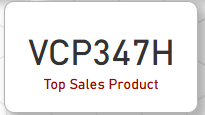
    
    - Valor total de vendas:

    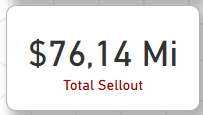

    - Quantidade total de produtos vendidos:

    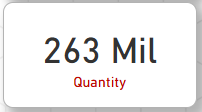
- Gráfico de evolução mensal das vendas e quantidades vendidas:

    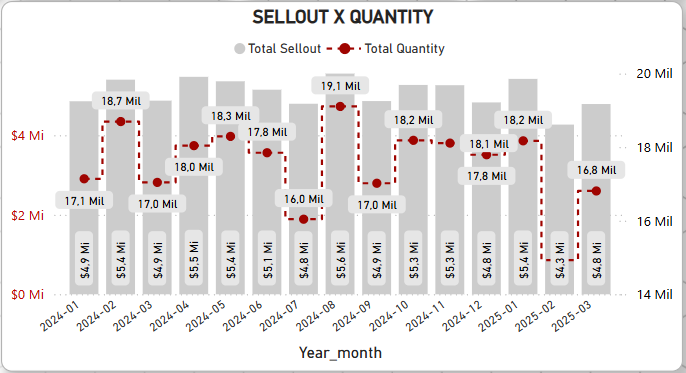
- Tabela com os valores mês a mês separados por distribuidor:

    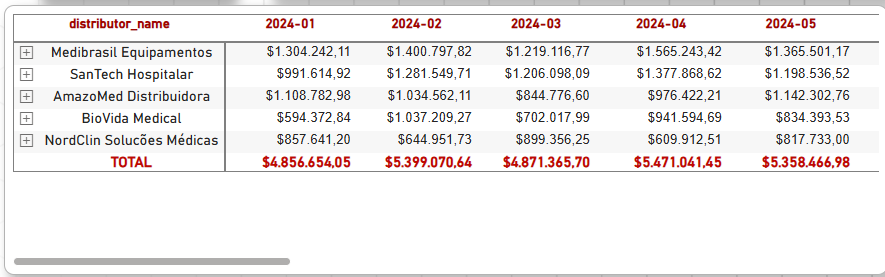

    - Também nesse gráfico é possível expandir para visualização por produtos:

    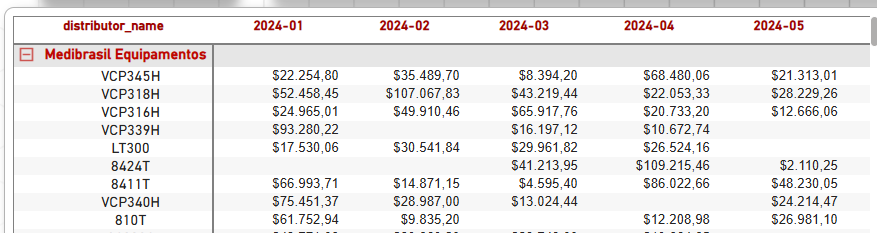

Com isso, o dashboard ficou capaz de responder as perguntas, onde as respostas são:

1. Qual foi o produto mais vendido em termos de valor?
    - Resposta: Observando o card informativo de "Top Sales Produto" ou a primeira ocorrência na barra lateral, o produto VCP347H teve o maior total de vendas.

    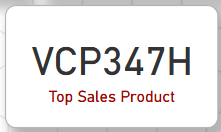
2. Qual é o total de vendas (Sellout) no período?
    - Resposta: Observando o card informativo central de Total Sellout podemos responder que o total de vendas foi $ 76,14 milhões.

    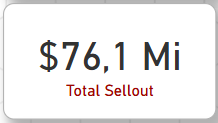
3. Qual foi a quantidade total de produtos vendidos?
    - Resposta: Observando o card informativo central de Quantity, podemos responder que foram vendidas 263 mil unidades.

    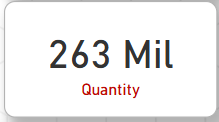
4. Quais são os top 5 produtos mais vendidos em valor?
    - Resposta: Observando a lista de produtos mais vendidos está na barra lateral, podemos responde que os tops 5 produtos são: VCP347H, 8424T, 8423T, MCP427H e VCP345H.

    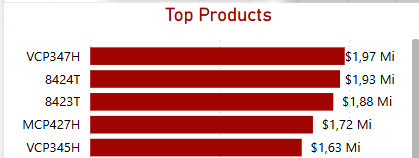
5. Qual o desempenho de um produto específico?
    - Resposta: Utilizando o filtro de produtos, podemos visualizar, por exemplo, o desempenho do produto 628H:

    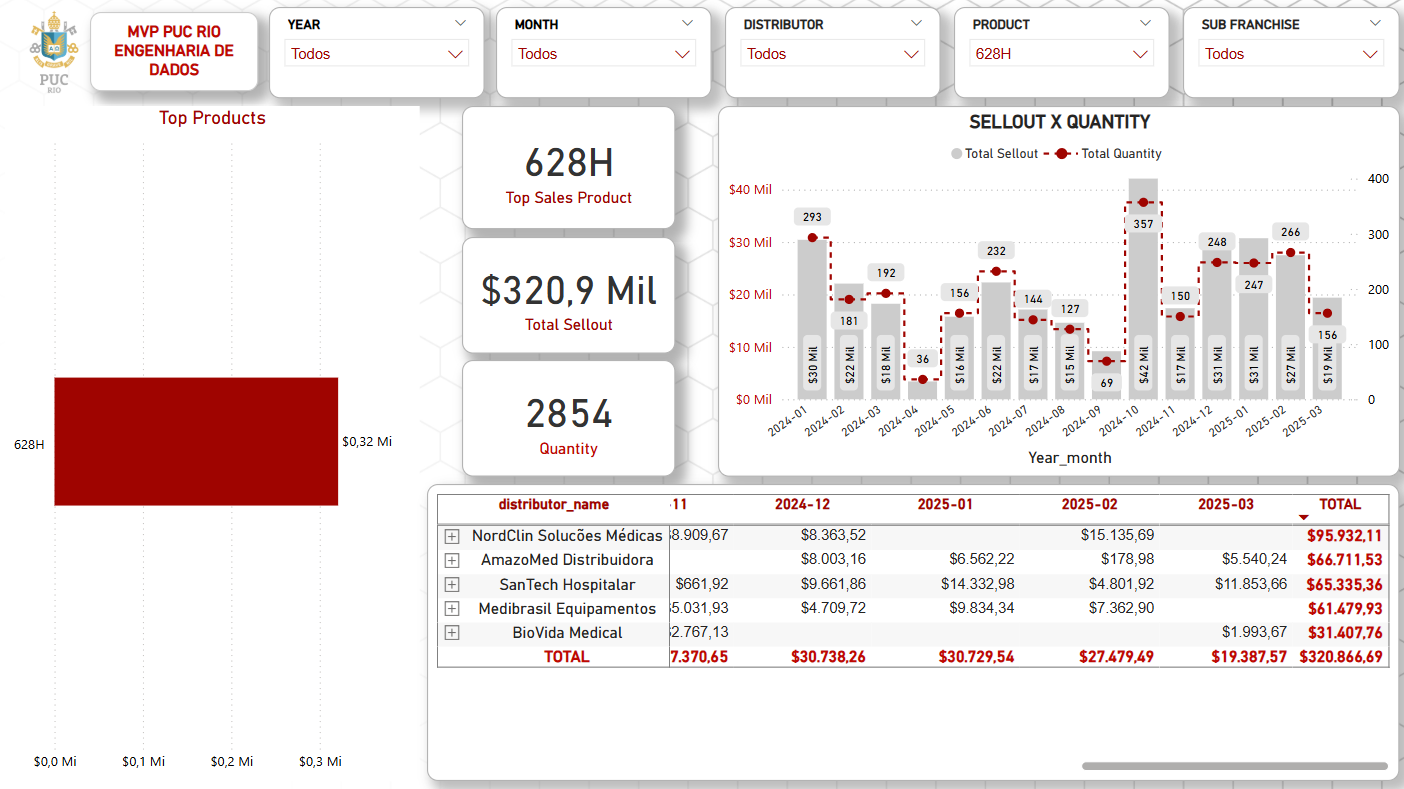

    No qual teve:
    - O valor de $ 320,9 mil aproximado de vendas
    - 2854 unidades vendidas
    - Seu maior desempenho foi no mês de Outubro de 2024 com $ 42,0 mil aproximado de vendas
    - O distribuidor que teve mais vendas ao longo do periodo foi NordClin Solucões Médicas, com $ 95.932,11 de vendas no total
6. Quais distribuidores venderam mais?
    - Resposta: Verificando ao longo do periodo, a tabela com os valores separado por distribuidor podemos ordernar pelo total, e com isso podemos responder que o distribuidores Medibrasil Equipamentos foi qual teve o melhor desempenho no periodo em questão, com um valor de $ 19.590.926,28

    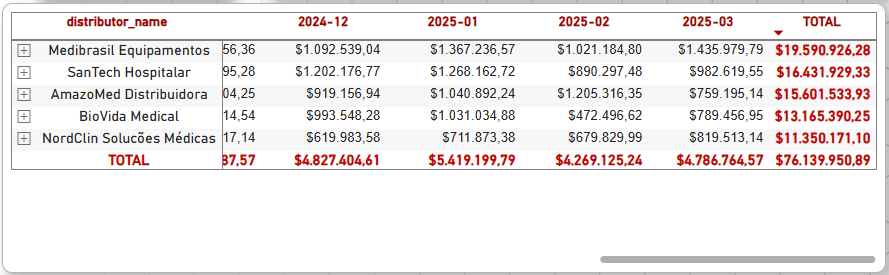
7. Quanto cada distribuidor vendeu por mês?
    - Resposta: Utilizando tambem a tabela com os valores separado por distribuidor, podemos verificar quanto cada distribuido vendo por mês

    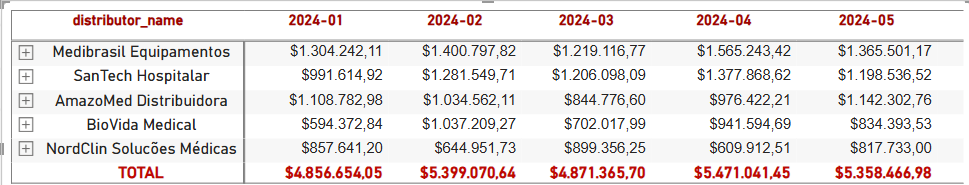
    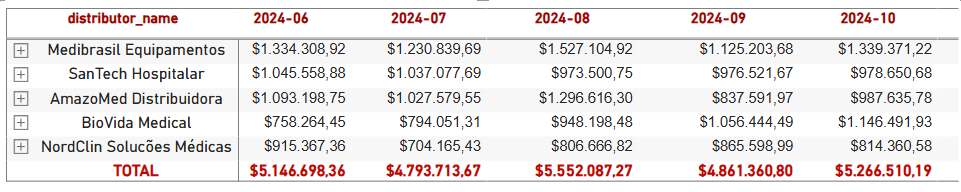
    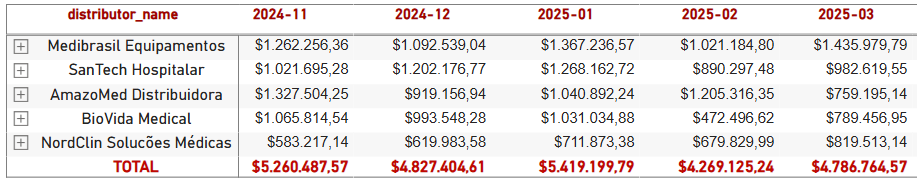
8. Qual foi o mês com maior faturamento total?
    - Resposta: Observando o grafico de progreção mensal, podemos responder que o mês com maior faturamento foi o mês de O mês 2024-08 teve o maior faturamento: $ 5.6 milhões aproximadamente em vendas
9. Há uma queda ou aumento nas vendas recentes?
    - Resposta: Observando o gráfico de progreção mês a mês junto com os filtros podemos responder essa pergunta, por exemplo  se olharmos os ultimos dois meses, 2025-02 e 2025-03, podemos notar uma crescente no volume de vendas

    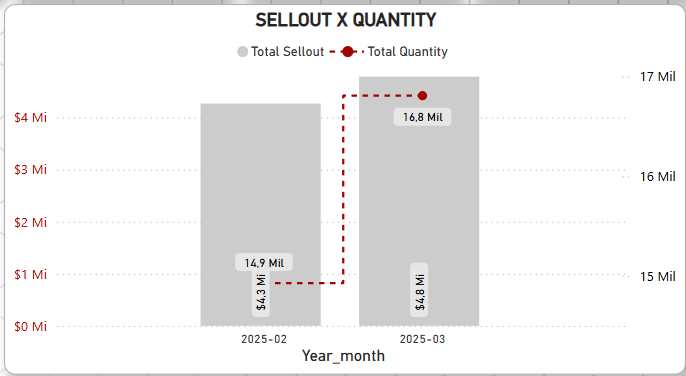

    Agora uma comparação anul, ativando o filtro para apenas mês 1, podemos comparar 2024-01 com 2025-01, onde tambem tivemos um aumento na receita:

    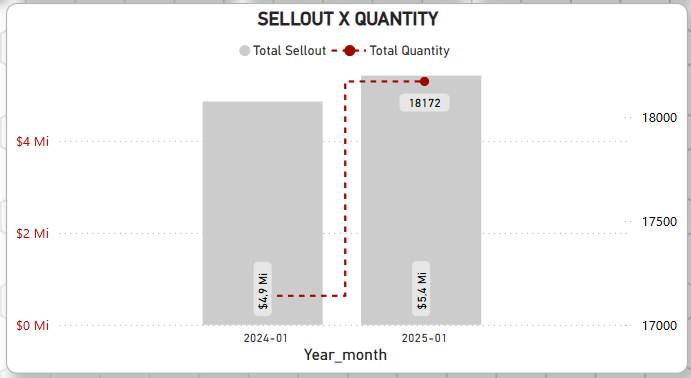

# **Conclusão**

Este projeto de criação de um Pipeline de Dados para Processamento e Análise de Sellout no Google Cloud Platform demonstrou a importância de uma arquitetura robusta e escalável para lidar com grandes volumes de dados.

Desde a configuração inicial da conta no GCP até a implementação das camadas do Data Lake e do Data Warehouse, foram desenvolvidas diversas estratégias para garantir a qualidade, integridade e eficiência no processamento dos dados, com criação de Buckts no Cloud Storage para armazenamento, um fluxo de ingestão de dados com o Cloud Run, o desenvolvimento de gestão e governaça de dados no BigQuery e por fim um dashboard interativo para responder as perguntas do negócio.

Com essa estrutura implementada, podemos otimizar o processo de coleta e análise, a solução garante escalabilidade para suportar um crescimento contínuo dos dados. 

Como próximos passos, podemos explorar a aplicação de modelos preditivos para identificar tendências e gerar insights estratégicos, agregando ainda mais valor aos dados coletados.
